In [2]:
pacman::p_load(ggplot2,dplyr,tidyverse,tidyr,cowplot,patchwork,psych,
               beeswarm,ggbeeswarm,data.table,ggridges,rjson,ggupset)

## Read in external data (from `organize-data.ipynb`)

In [3]:
curr_date = "2022-01-24"
all_results = data.frame(fread(file.path("..","data-output", paste0("all_results.",curr_date,".csv"))))
all_eukulele_compare = data.frame(fread(file.path("..","data-output", 
                                                  paste0("all_eukulele_compare.",curr_date,".csv"))))
all_compared_designer = data.frame(fread(file.path("..","data-output",
                                                   paste0("all_compared_designer.",curr_date,".csv"))))
count_cluster_all = data.frame(fread(file.path("..","data-output", 
                                               paste0("count_cluster_all.",curr_date,".csv"))))
eukulele_prot_annots = data.frame(fread(file.path("..","data-output", 
                                                  paste0("eukulele_prot_annots.",curr_date,".csv"))))
cag_sizes=data.frame(fread(file.path("..","data-output", 
                                    paste0("cag_sizes.",curr_date,".csv"))))
designer_sizes=data.frame(fread(file.path("..","data-output", 
                                    paste0("designer_sizes.",curr_date,".csv"))))
concat_sizes=data.frame(fread(file.path("..","data-output", 
                                    paste0("concat_sizes.",curr_date,".csv"))))
compared_sizes=data.frame(fread(file.path("..","data-output", 
                                    paste0("compared_sizes.",curr_date,".csv"))))
kegg_ko_incidence=data.frame(fread(file.path("..","data-output", 
                                    paste0("kegg_ko_incidence.",curr_date,".csv"))))
count_genera=data.frame(fread(file.path("..","data-output", 
                                    paste0("count_genera.",curr_date,".csv"))))
correct_uncorrect=data.frame(fread(file.path("..","data-output", 
                                    paste0("correct_uncorrect.",curr_date,".csv"))))
compared_species=data.frame(fread(file.path("..","data-output", 
                                    paste0("compared_species.",curr_date,".csv"))))
number_cats=data.frame(fread(file.path("..","data-output", 
                                    paste0("number_cats.",curr_date,".csv"))))

## Read in external data (from `subset-assemblies.ipynb`)

In [4]:
curr_date = "2022-01-24"

compare_conds_tab=data.frame(fread(file.path("..","data-output", 
                                    paste0("compare_conds_tab.",curr_date,".csv"))))
count_assembler_clust=data.frame(fread(file.path("..","data-output", 
                                    paste0("count_assembler_clust.",curr_date,".csv"))))

## Read in external data (from `check-protein-production.ipynb`)

In [5]:
prot_merg_ct=data.frame(fread(file.path("..","data-output", 
                                    paste0("prot_merg_ct.",curr_date,".csv"))))

In [6]:
all_number_proteins_designer=data.frame(fread(file.path("..","data-output", 
                                    paste0("all_number_proteins_designer.",curr_date,".csv"))))
all_number_proteins_merged=data.frame(fread(file.path("..","data-output", 
                                    paste0("all_number_proteins_merged.",curr_date,".csv"))))

## Read in external data (from `narragansett-process.csv`)

In [7]:
EUKulele_frame_check=data.frame(fread(file.path("..","data-output","EUKulele_frame_check.csv")))

## Figure 3: basic assembly statistics

In [38]:
# read in the salmon files from the individual assemblies
base_dir = "/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21"
percent_mapped_byassembler_all = data.frame()
for (jeukebox_dir in list.files(base_dir)) {
    if (!grepl("jEUKebox",jeukebox_dir)) {
        next
    }
    comm_curr = unlist(strsplit(jeukebox_dir,"-"))
    comm_curr = comm_curr[length(comm_curr)]
    if (comm_curr == "100k") {
        comm_curr = "A"
    } else {
        comm_curr = "B"
    }
    stub_dir = file.path(base_dir, jeukebox_dir,
                         "eukrhythmic_assembly/intermediate-files/04-compare/xx-individual-mapping/salmon")
    if (!dir.exists(stub_dir)) {
        next
    }
    list_names = c()
    list_percents = c()
    list_assemblers = c()
    for (dir in list.files(stub_dir)) {
        if (grepl("quant",dir)) {
            if (file.exists(file.path(stub_dir, dir, "aux_info", "meta_info.json"))) {
                curr_file = file.path(stub_dir, dir, "aux_info", "meta_info.json")
                json_percentmapped = fromJSON(paste(readLines(curr_file), collapse=""))$percent_mapped
                qualifiers = unlist(strsplit(dir,"_"))
                list_percents = c(list_percents,json_percentmapped)
                list_assemblers = c(list_assemblers, qualifiers[5])
                list_names = c(list_names, qualifiers[4])
            }
        }
    }
    percent_mapped_byassembler = data.frame("PercentMapped" = list_percents,
                                            "Assemblers" = list_assemblers,
                                            "Community" = list_names,
                                            "jEUKebox" = jeukebox_dir,
                                            "MMETSPGroup" = comm_curr)
    percent_mapped_byassembler_all = percent_mapped_byassembler_all %>%
        bind_rows(percent_mapped_byassembler)
}

Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial1-100k/eukrhythmic_assembly/intermediate-files/04-compare/xx-individual-mapping/salmon/sim_raw_reads_1_megahit_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial1-100k/eukrhythmic_assembly/intermediate-files/04-compare/xx-individual-mapping/salmon/sim_raw_reads_1_rnaspades_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial1-100k/eukrhythmic_assembly/intermediate-files/04-compare/xx-individual-mapping/salmon/sim_raw_reads_1_spades_quant/aux_info/meta_info.json'”
Warning message

Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial2-100k/eukrhythmic_assembly/intermediate-files/04-compare/xx-individual-mapping/salmon/sim_raw_reads_1_rnaspades_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial2-100k/eukrhythmic_assembly/intermediate-files/04-compare/xx-individual-mapping/salmon/sim_raw_reads_1_spades_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial2-100k/eukrhythmic_assembly/intermediate-files/04-compare/xx-individual-mapping/salmon/sim_raw_reads_1_trinity_quant/aux_info/meta_info.json'”
Warning message

Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial3-100k/eukrhythmic_assembly/intermediate-files/04-compare/xx-individual-mapping/salmon/sim_raw_reads_1_spades_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial3-100k/eukrhythmic_assembly/intermediate-files/04-compare/xx-individual-mapping/salmon/sim_raw_reads_1_trinity_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial3-100k/eukrhythmic_assembly/intermediate-files/04-compare/xx-individual-mapping/salmon/sim_raw_reads_2_megahit_quant/aux_info/meta_info.json'”
Warning message i

In [39]:
# read in the salmon files from the designer assemblies
base_dir = "/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21"
percent_mapped_designer_all = data.frame()
for (jeukebox_dir in list.files(base_dir)) {
    if (!grepl("jEUKebox",jeukebox_dir)) {
        next
    }
    comm_curr = unlist(strsplit(jeukebox_dir,"-"))
    comm_curr = comm_curr[length(comm_curr)]
    if (comm_curr == "100k") {
        comm_curr = "A"
    } else {
        comm_curr = "B"
    }
    stub_dir = file.path(base_dir, jeukebox_dir,
                         "08-salmon_mapping")
    if (!dir.exists(stub_dir)) {
        next
    }
    list_names = c()
    list_percents = c()
    list_assemblers = c()
    for (dir in list.files(stub_dir)) {
        if (grepl("quant",dir)) {
            if (file.exists(file.path(stub_dir, dir, "aux_info", "meta_info.json"))) {
                curr_file = file.path(stub_dir, dir, "aux_info", "meta_info.json")
                json_percentmapped = fromJSON(paste(readLines(curr_file), collapse=""))$percent_mapped
                qualifiers = unlist(strsplit(dir,"_"))
                list_percents = c(list_percents,json_percentmapped)
                list_names = c(list_names, qualifiers[1])
            }
        }
    }
    percent_mapped_designer = data.frame("PercentMapped" = list_percents,
                                         "Community" = list_names,
                                         "jEUKebox" = jeukebox_dir,
                                         "MMETSPGroup" = comm_curr)
    percent_mapped_designer_all = percent_mapped_designer_all %>%
        bind_rows(percent_mapped_designer)
}

Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial1-100k/08-salmon_mapping/1_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial1-100k/08-salmon_mapping/2_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial1-100k/08-salmon_mapping/3_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial1-100k/08-salmon_mapping/4_quant/aux_info/meta_info.json'”
Warning message in readL

Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial3-CommB/08-salmon_mapping/5_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial3-CommB/08-salmon_mapping/6_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial4-100k/08-salmon_mapping/1_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial4-100k/08-salmon_mapping/2_quant/aux_info/meta_info.json'”
Warning message in rea

In [41]:
# read in the salmon files from the CAG assemblies
base_dir = "/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21"
percent_mapped_cag_all = data.frame()
for (jeukebox_dir in list.files(base_dir)) {
    if (!grepl("jEUKebox",jeukebox_dir)) {
        next
    }
    comm_curr = unlist(strsplit(jeukebox_dir,"-"))
    comm_curr = comm_curr[length(comm_curr)]
    if (comm_curr == "100k") {
        comm_curr = "A"
    } else {
        comm_curr = "B"
    }
    stub_dir = file.path(base_dir, jeukebox_dir,
                         "eukrhythmic_assembly/intermediate-files/04-compare/09-CAG-mapping/salmon")
    if (!dir.exists(stub_dir)) {
        next
    }
    list_names = c()
    list_percents = c()
    list_assemblers = c()
    for (dir in list.files(stub_dir)) {
        if (grepl("quant",dir)) {
            if (file.exists(file.path(stub_dir, dir, "aux_info", "meta_info.json"))) {
                curr_file = file.path(stub_dir, dir, "aux_info", "meta_info.json")
                json_percentmapped = fromJSON(paste(readLines(curr_file), collapse=""))$percent_mapped
                qualifiers = unlist(strsplit(dir,"_"))
                list_percents = c(list_percents,json_percentmapped)
                list_assemblers = c(list_assemblers, qualifiers[5])
                list_names = c(list_names, qualifiers[4])
            }
        }
    }
    percent_mapped_cag = data.frame("PercentMapped" = list_percents,
                                    "Assemblers" = list_assemblers,
                                    "Community" = list_names,
                                    "jEUKebox" = jeukebox_dir,
                                    "MMETSPGroup" = comm_curr)
    percent_mapped_cag_all = percent_mapped_cag_all %>%
        bind_rows(percent_mapped_cag)
}

Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial1-100k/eukrhythmic_assembly/intermediate-files/04-compare/09-CAG-mapping/salmon/sim_raw_reads_1_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial1-100k/eukrhythmic_assembly/intermediate-files/04-compare/09-CAG-mapping/salmon/sim_raw_reads_2_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial1-100k/eukrhythmic_assembly/intermediate-files/04-compare/09-CAG-mapping/salmon/sim_raw_reads_3_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final li

Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial3-100k/eukrhythmic_assembly/intermediate-files/04-compare/09-CAG-mapping/salmon/sim_raw_reads_4_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial3-100k/eukrhythmic_assembly/intermediate-files/04-compare/09-CAG-mapping/salmon/sim_raw_reads_5_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21/jEUKebox-Trial3-100k/eukrhythmic_assembly/intermediate-files/04-compare/09-CAG-mapping/salmon/sim_raw_reads_6_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final li

In [28]:
gc_content_plot = ggplot(concat_sizes) + geom_density_ridges(aes(x = GCFract, y = Source, fill = MMETSPGroup),
                                                              alpha = 0.7) +
    theme_bw(base_size=16) + 
    scale_fill_manual(name = "Assembly", values = c('#AA3377', '#BBBBBB'),
                      breaks = c("Reassembled","Designer"),
                      labels = c("reassembly","designer")) +
    scale_fill_manual(name = "MMETSP Group", values = c("#EE6677",'#66CCEE')) + 
    xlab("GC fraction") + ylab("")+
    theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank())

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



In [32]:
gc_content_plot_no_grp = ggplot(concat_sizes) + geom_density_ridges(aes(x = GCFract, 
                                                                        y = Source),
                                                              alpha = 0.7,fill="#66CCEE") +
    theme_bw(base_size=16) + 
    scale_fill_manual(name = "Assembly", values = c('#AA3377', '#BBBBBB'),
                      breaks = c("Reassembled","Designer"),
                      labels = c("reassembly","designer")) +
    xlab("GC fraction") + ylab("")+
    theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank())

In [34]:
sizes_des_plot = ggplot(concat_sizes) + geom_density_ridges(aes(x = Sizes, y = Source, fill = MMETSPGroup),
                                                              alpha = 0.7) +
    theme_bw(base_size=16) + 
    scale_fill_manual(name = "Assembly", values = c('#AA3377', '#BBBBBB'),
                      breaks = c("Reassembled","Designer"),
                      labels = c("reassembly","designer")) +
    scale_fill_manual(name = "MMETSP Group", values = c("#EE6677",'#66CCEE')) + 
    xlab("Log contig length") + ylab("") + scale_x_log10()

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



In [36]:
sizes_des_plot_no_grp = ggplot(concat_sizes) + geom_density_ridges(aes(x = Sizes, 
                                                                        y = Source,),
                                                              alpha = 0.7,fill="#66CCEE") +
    theme_bw(base_size=16) + 
    scale_fill_manual(name = "Assembly", values = c('#AA3377', '#BBBBBB'),
                      breaks = c("Reassembled","Designer"),
                      labels = c("reassembly","designer")) +
    xlab("Log contig length") + ylab("") + scale_x_log10()

Picking joint bandwidth of 0.00478



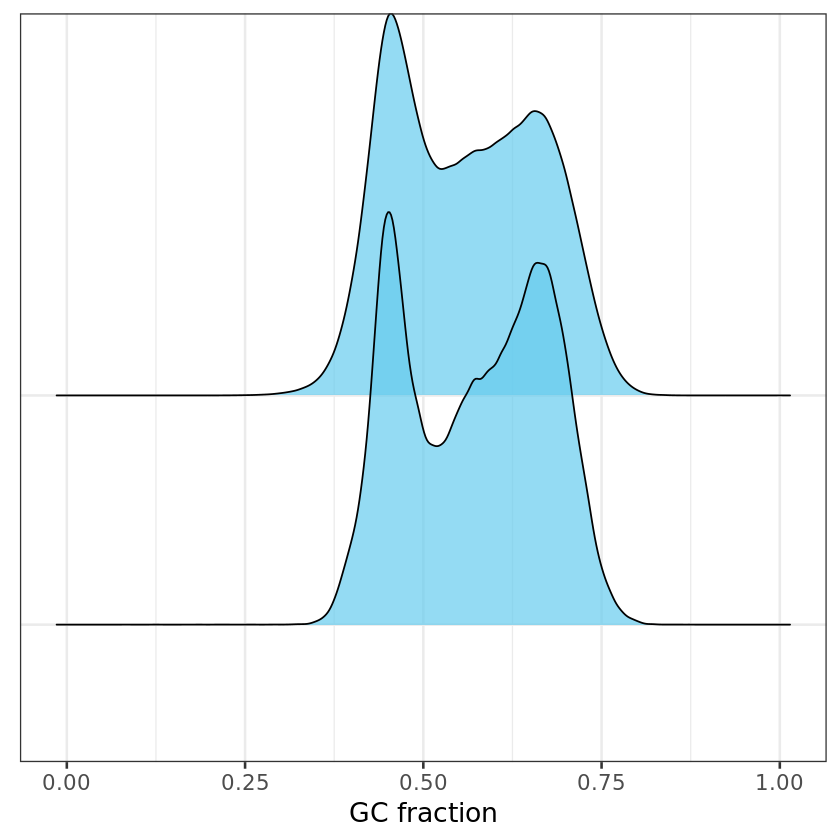

In [33]:
gc_content_plot_no_grp

Picking joint bandwidth of 0.0155



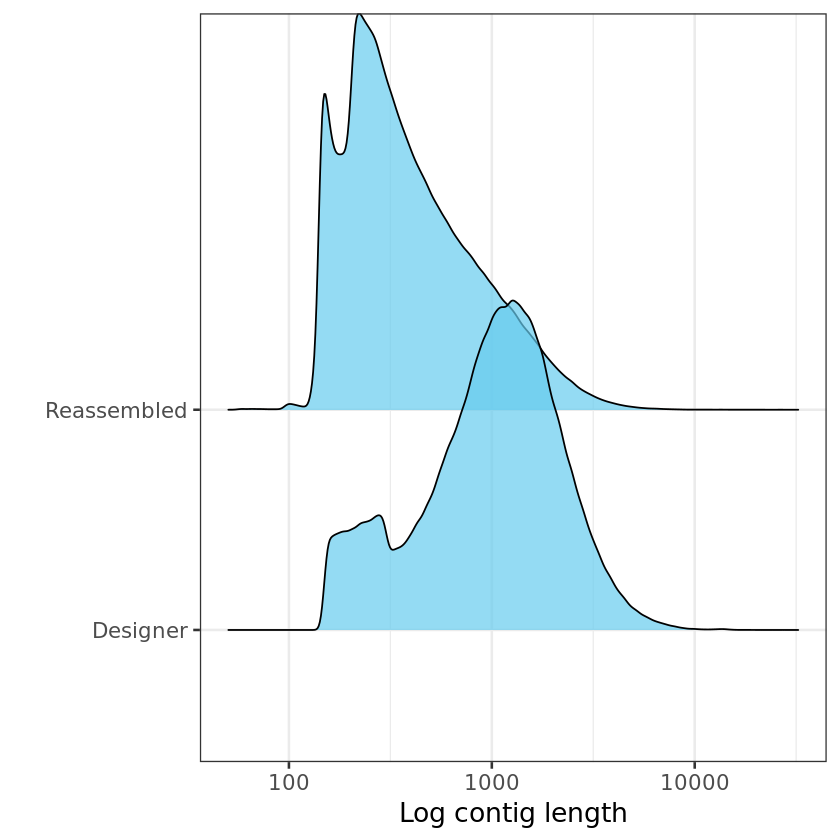

In [37]:
sizes_des_plot_no_grp

In [42]:
combined_for_plot = (percent_mapped_designer_all %>% dplyr::mutate(Source = "Designer")) %>%
    bind_rows(percent_mapped_cag_all %>% dplyr::mutate(Source = "Reassembly"))
percent_map_plot = ggplot(combined_for_plot, aes(y = Source)) + 
    geom_density_ridges(aes(x = PercentMapped, fill = MMETSPGroup),alpha = 0.7) + 
    theme_bw(base_size=16) + ylab("") + xlab("Salmon percentage mapping") +
    geom_vline(data = combined_for_plot %>% dplyr::group_by(Source,MMETSPGroup) %>% 
               dplyr::summarize(meanPM = mean(PercentMapped)), 
               aes(xintercept = meanPM,color = MMETSPGroup,linetype=Source),size=1,alpha=0.5,guides=FALSE) +
 guides(linetype = "none") + 
 scale_linetype_discrete(guide = FALSE) +
 scale_fill_manual(name = "MMETSP Group", values = c("#EE6677",'#66CCEE')) + 
 scale_color_manual(name = "MMETSP Group", values = c("#EE6677",'#66CCEE'), guide=FALSE) + 
 xlim(c(75,100))

`summarise()` has grouped output by 'Source'. You can override using the `.groups` argument.

Warning message:
“Ignoring unknown parameters: guides”


In [50]:
percent_map_plot_no_grp = ggplot(combined_for_plot, aes(y = Source)) + 
    geom_density_ridges(aes(x = PercentMapped),alpha = 0.7,fill="#66CCEE") + 
    theme_bw(base_size=16) + ylab("") + xlab("Salmon percentage mapping") +
    geom_vline(data = combined_for_plot %>% dplyr::group_by(Source) %>% 
               dplyr::summarize(meanPM = mean(PercentMapped)), 
               aes(xintercept = meanPM,linetype=Source),color = "#66CCEE",size=1,alpha=0.5,guides=FALSE) +
 guides(linetype = "none") + 
 scale_linetype_discrete(guide = FALSE) +
 xlim(c(75,100))

Warning message:
“Ignoring unknown parameters: guides”


Picking joint bandwidth of 0.43



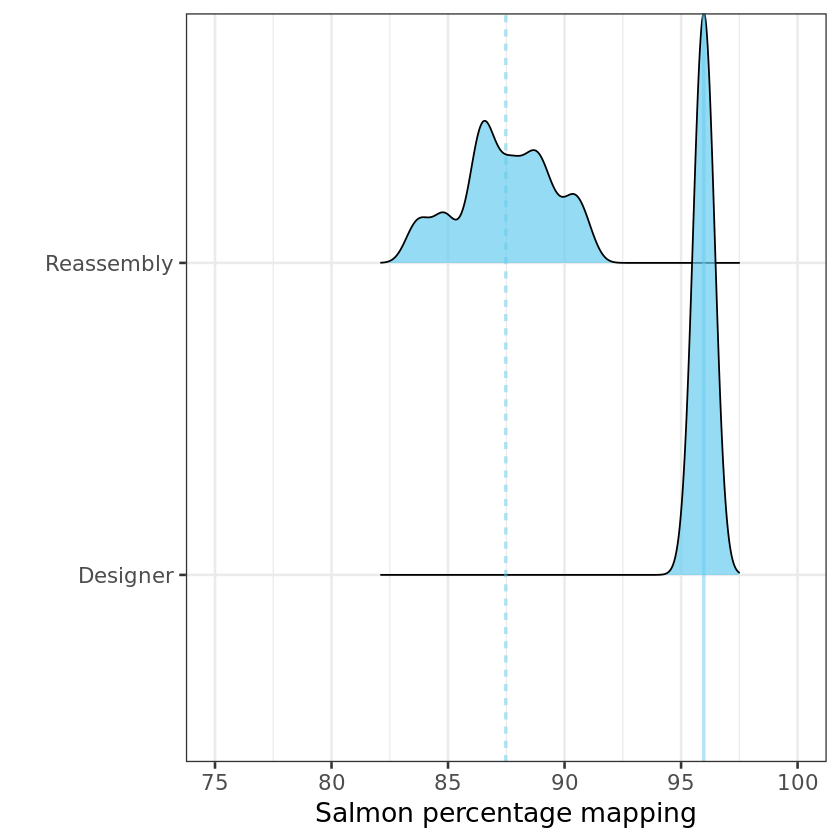

In [51]:
percent_map_plot_no_grp

Picking joint bandwidth of 0.459

Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Picking joint bandwidth of 0.0177

Picking joint bandwidth of 0.00541



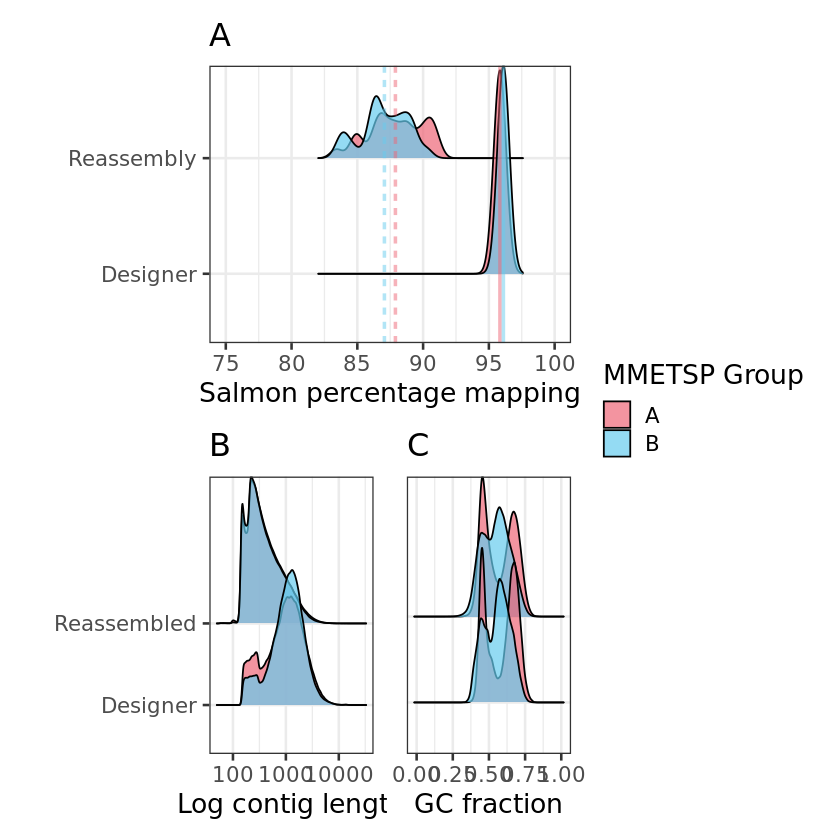

In [52]:
patchwork_fig_3 = (percent_map_plot + ggtitle("A")) / (((sizes_des_plot + ggtitle("B")) |
                                              (gc_content_plot + ggtitle("C")))) +
  plot_layout(guides = 'collect')
patchwork_fig_3

Picking joint bandwidth of 0.43

Picking joint bandwidth of 0.0155

Picking joint bandwidth of 0.00478

Picking joint bandwidth of 0.43

Picking joint bandwidth of 0.0155

Picking joint bandwidth of 0.00478



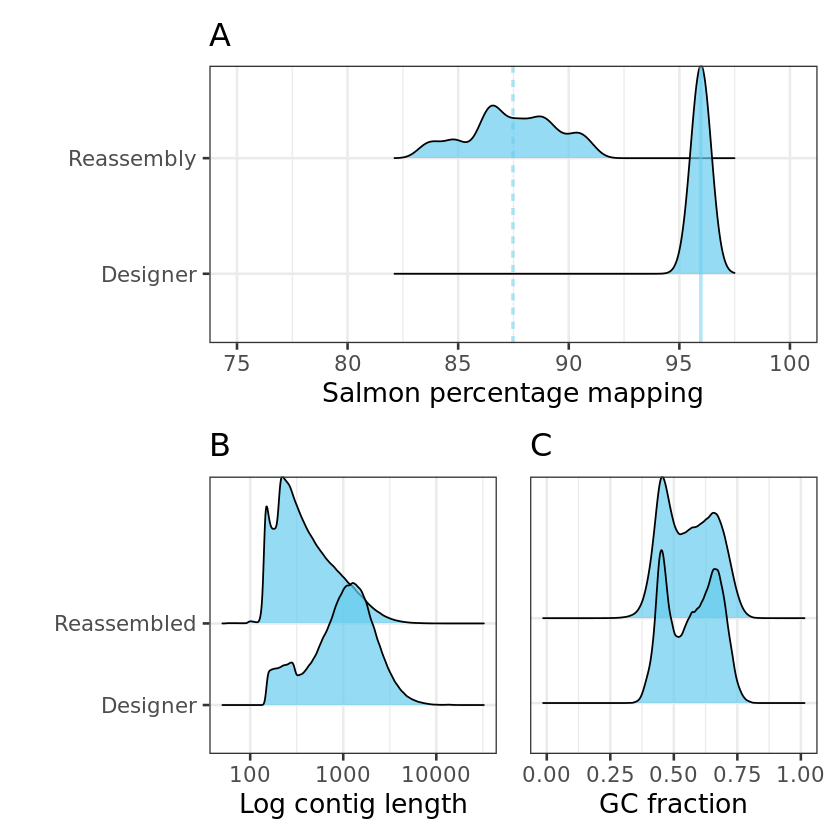

In [85]:
patchwork_fig_3_no_grp = (percent_map_plot_no_grp + ggtitle("A")) / (((sizes_des_plot_no_grp + ggtitle("B")) |
                                              (gc_content_plot_no_grp + ggtitle("C")))) +
  plot_layout(guides = 'collect')
patchwork_fig_3_no_grp
ggsave(file.path("..","figures","Fig3-basic_assembly_stats.png"),dpi=400,width=10,height=6,units="in")

## Figure 4: `EUKulele` and abundances

`geom_smooth()` using formula 'y ~ x'



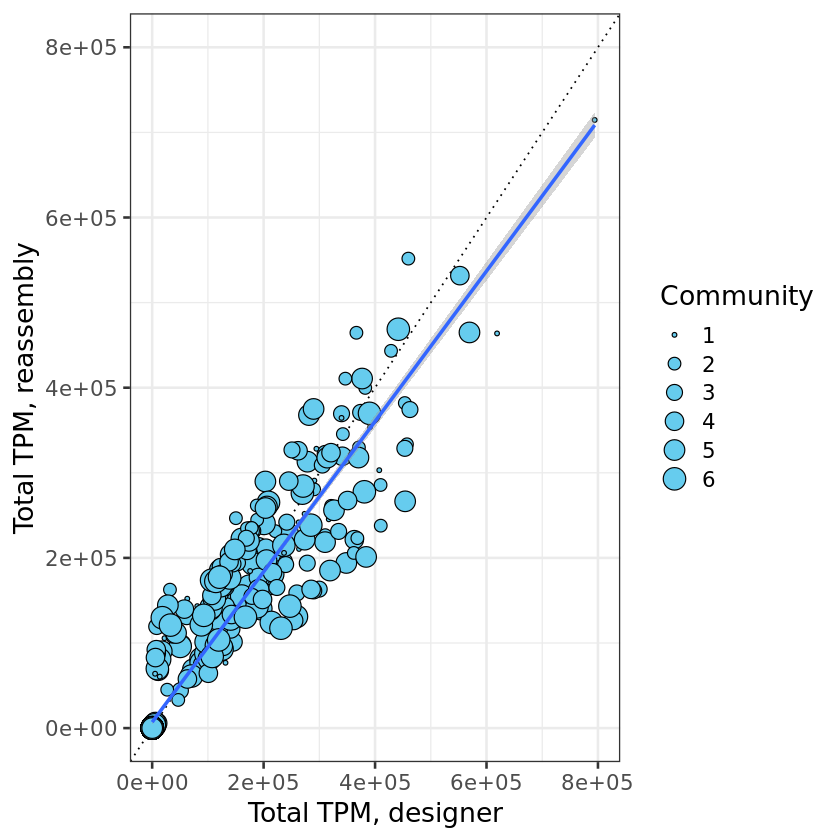

In [82]:
panel1plt = ggplot(compared_species) + 
 geom_abline(intercept = 0, slope = 1,linetype="dotted") + 
 geom_point(aes(x = DesignerGenusTPM,
                y = CAGGenusTPM,
                size = Community),
                #fill = MMETSPGroup),
            pch=21,fill="#66CCEE") + 
 geom_smooth(aes(x = DesignerGenusTPM, y = CAGGenusTPM),method="lm") +
 theme_bw(base_size=16) + ylab("Total TPM, reassembly") + 
 xlab("Total TPM, designer") + xlim(c(0,800000)) + 
 ylim(c(0,800000)) #+ 
 #scale_fill_manual(name = "MMETSP Group", values = c("#EE6677",'#66CCEE'))
panel1plt

Warning message:
“Ignoring unknown parameters: notch”


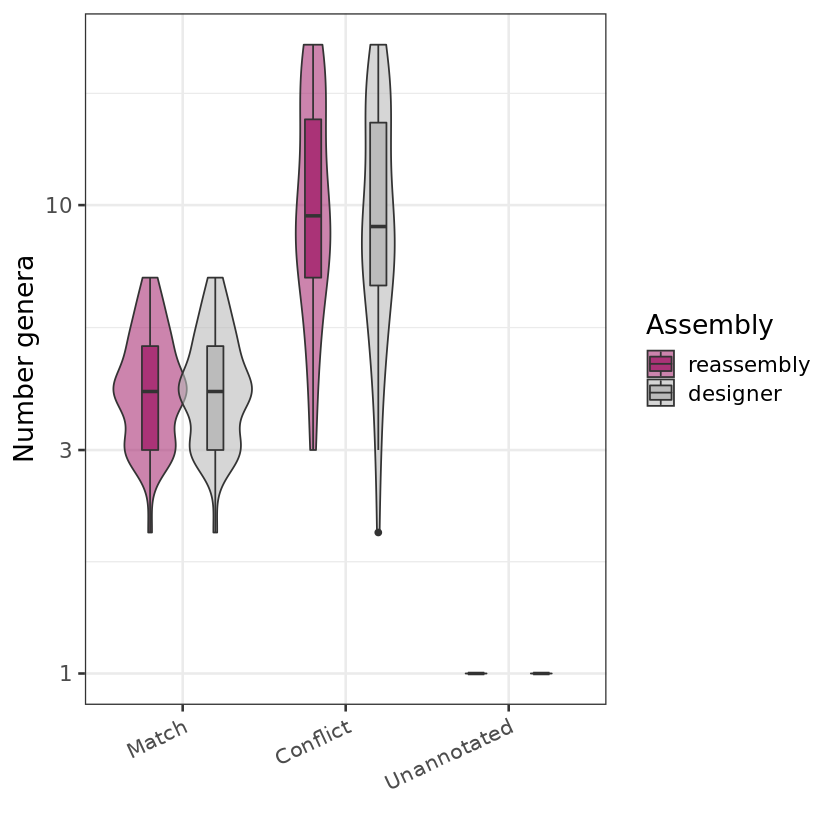

In [80]:
panel3plt = ggplot(count_genera) + 
    geom_violin(aes(x = Correct,y = Genus.measure_list_set,fill = Source),notch=TRUE,
                position=position_dodge(width = 0.8),alpha=0.6) + 
    geom_boxplot(aes(x = Correct,y = Genus.measure_list_set,fill=Source),
                 width=0.2,position=position_dodge(width = 0.8)) + 
    theme_bw(base_size=16) + ylab("Number genera") + 
    scale_x_discrete(limits=c("Match","Conflict","Unannotated")) + 
    scale_y_log10() + 
    scale_fill_manual(name = "Assembly", values = c('#AA3377', '#BBBBBB'),
                      breaks = c("CAGGenusTPM","DesignerGenusTPM"),
                      labels = c("reassembly","designer")) + 
    scale_color_manual(name = "MMETSP Group", values = c("red","blue")) + xlab("") + 
    theme(axis.text.x = element_text(angle = 25, vjust = 1, hjust=1))

panel3plt

Warning message:
“Ignoring unknown parameters: notch”


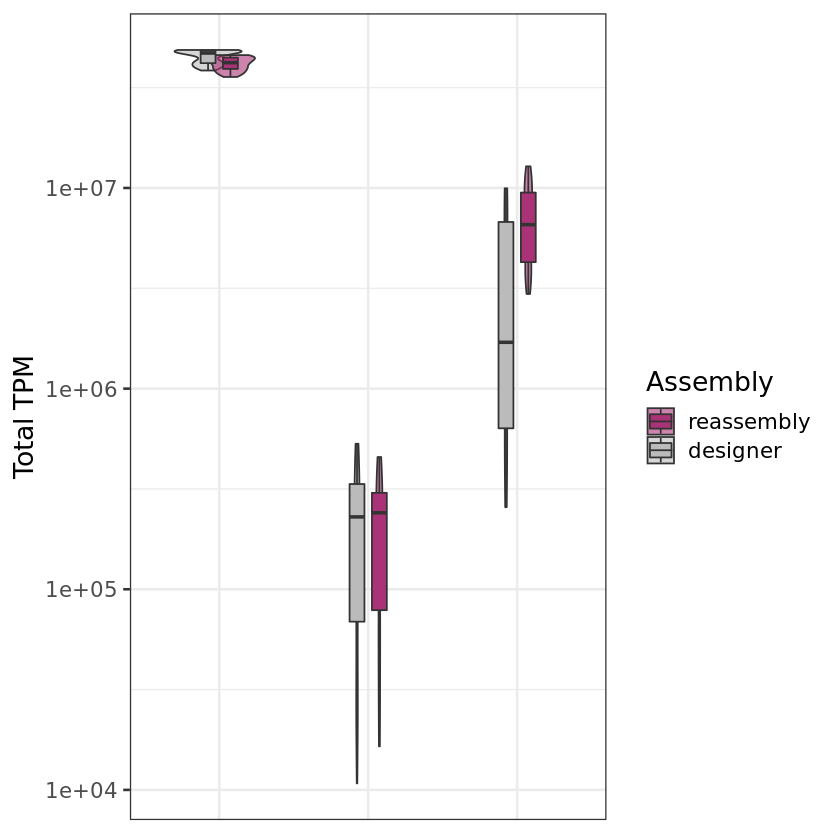

In [81]:
panel2plt = ggplot(correct_uncorrect) +
    geom_violin(aes(x = Correct,y = TPM,fill = Source),notch=TRUE,
                position=position_dodge(width = 0.3),alpha=0.6) + 
    geom_boxplot(aes(x = Correct,y = TPM,fill=Source),
                 width=0.2,position=position_dodge(width = 0.3)) + 
    theme_bw(base_size=16) + ylab("Total TPM") + 
    scale_x_discrete(limits=c("Match","Conflict","Unannotated")) + 
    scale_y_log10() + 
    scale_fill_manual(name = "Assembly", values = c('#AA3377', '#BBBBBB'),
                      breaks = c("reassembly","designer"),
                      labels = c("reassembly","designer")) + xlab("") +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) 
panel2plt

In [83]:
patchwork_fig = (panel1plt + ggtitle("A")) + ((panel2plt + ggtitle("B")) / 
                                              (panel3plt + ggtitle("C"))) +
  plot_layout(guides = 'collect') + 
  plot_layout(widths = c(2, 1))
ggsave(patchwork_fig,file=file.path("..","figures","Fig4-patchwork_eukulele_fig.png"),dpi=600,
       width=10,height=6,units="in")

`geom_smooth()` using formula 'y ~ x'



`geom_smooth()` using formula 'y ~ x'



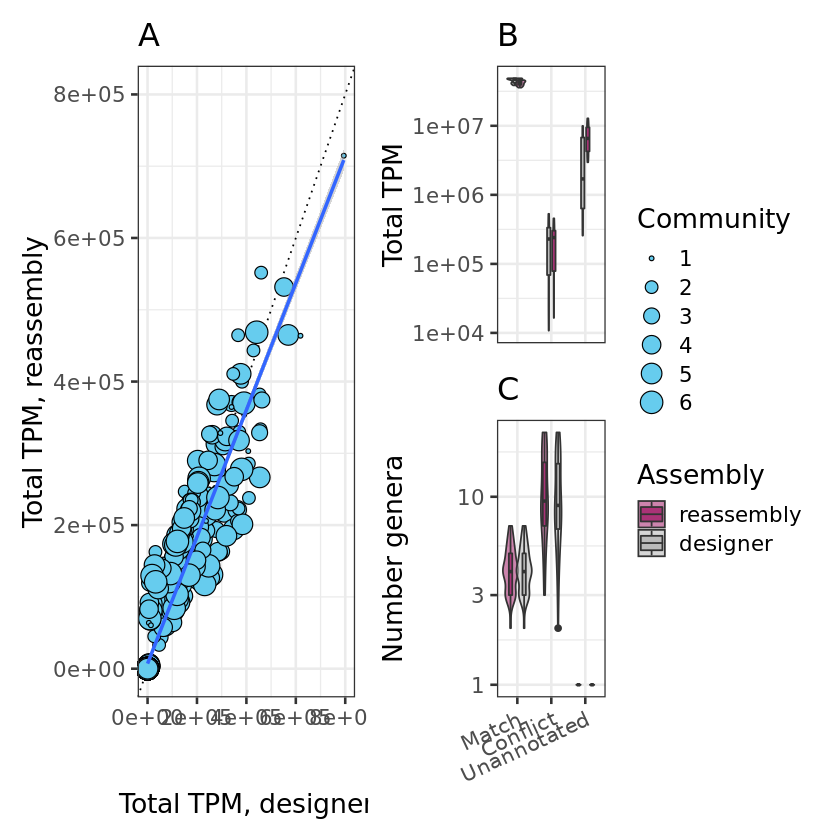

In [84]:
patchwork_fig

## Figure 5: functional figure

In [64]:
pivoted_KO_info = kegg_ko_incidence %>% pivot_wider(id_cols=c(KEGG_ko,jEUKebox,MMETSPGroup), 
                                                    names_from = Source,
                                 values_from = query)

for_upset = pivoted_KO_info %>% dplyr::filter(KEGG_ko != "-") %>%
    mutate_all(~replace(., is.nan(.), 0)) %>%
    dplyr::group_by(jEUKebox,MMETSPGroup) %>%
    pivot_longer(cols=c(CAG,Designer,megahit,rnaspades,spades,trinity),
                 names_to="Assembler",values_to="NumberIncidences") %>%
    dplyr::ungroup() %>%
    dplyr::filter(!is.na(NumberIncidences)) %>%
    dplyr::mutate(Assembler=case_when(Assembler == "CAG" ~ "Reassembly",
                TRUE ~ trimws(Assembler))) %>%
    dplyr::filter(Assembler != "Reassembly") %>%
    dplyr::group_by(jEUKebox,MMETSPGroup,KEGG_ko) %>%
    dplyr::summarize(AssemblerList = list(factor(unique(Assembler),
                                                  levels=c("Designer","rnaspades","spades",
                                                           "trinity","megahit"))),
                     AssemblerSup = unlist(lapply(list(unique(Assembler)),paste0,collapse="-")))  %>%
    dplyr::mutate(hasDesigner = case_when(grepl("Designer",AssemblerSup) ~ "Designer",
                                          TRUE ~ "-")) %>%
    group_by(AssemblerList,jEUKebox,MMETSPGroup,hasDesigner) %>%
    dplyr::tally() %>%
    dplyr::ungroup() %>% 
    group_by(AssemblerList,MMETSPGroup,hasDesigner) %>%
    dplyr::summarize(MeanSize = mean(n), StDevSize = sd(n))
    
for_upset_no_grp = pivoted_KO_info %>% dplyr::filter(KEGG_ko != "-") %>%
    mutate_all(~replace(., is.nan(.), 0)) %>%
    dplyr::group_by(jEUKebox,MMETSPGroup) %>%
    pivot_longer(cols=c(CAG,Designer,megahit,rnaspades,spades,trinity),
                 names_to="Assembler",values_to="NumberIncidences") %>%
    dplyr::ungroup() %>%
    dplyr::filter(!is.na(NumberIncidences)) %>%
    dplyr::mutate(Assembler=case_when(Assembler == "CAG" ~ "Reassembly",
                TRUE ~ trimws(Assembler))) %>%
    dplyr::filter(Assembler != "Reassembly") %>%
    dplyr::group_by(jEUKebox,MMETSPGroup,KEGG_ko) %>%
    dplyr::summarize(AssemblerList = list(factor(unique(Assembler),
                                                  levels=c("Designer","rnaspades","spades",
                                                           "trinity","megahit"))),
                     AssemblerSup = unlist(lapply(list(unique(Assembler)),paste0,collapse="-")))  %>%
    dplyr::mutate(hasDesigner = case_when(grepl("Designer",AssemblerSup) ~ "Designer",
                                          TRUE ~ "-")) %>%
    group_by(AssemblerList,jEUKebox,hasDesigner) %>%
    dplyr::tally() %>%
    dplyr::ungroup() %>% 
    group_by(AssemblerList,hasDesigner) %>%
    dplyr::summarize(MeanSize = mean(n), StDevSize = sd(n))

`summarise()` has grouped output by 'jEUKebox', 'MMETSPGroup'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'AssemblerList', 'MMETSPGroup'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'jEUKebox', 'MMETSPGroup'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'AssemblerList'. You can override using the `.groups` argument.



In [60]:
ko_upset = ggplot(for_upset, aes(x=AssemblerList, y = MeanSize)) +
    geom_bar(aes(fill = MMETSPGroup), stat="identity", position = position_dodge(width=0.9)) +
    geom_errorbar(aes(x=AssemblerList, ymin = MeanSize - StDevSize, 
                      ymax = MeanSize + StDevSize, fill = MMETSPGroup),
                      position = position_dodge(width=0.9)) + 
    scale_x_upset(order_by = "degree") + # intersections = unique(for_upset$AssemblerList)) +
    #scale_x_mergelist(sep = "-") +
    theme_bw(base_size = 16) +
    ylab("Incidence count") + xlab("") + 
    scale_fill_manual(name = "MMETSP Group", values = c("#EE6677",'#66CCEE')) + 
    ggtitle("Number of distinct KOs found")

Warning message:
“Ignoring unknown aesthetics: fill”


In [65]:
ko_upset_no_grp = ggplot(for_upset_no_grp, aes(x=AssemblerList, y = MeanSize)) +
    geom_bar(,fill="#66CCEE", stat="identity", position = position_dodge(width=0.9)) +
    geom_errorbar(aes(x=AssemblerList, ymin = MeanSize - StDevSize, 
                      ymax = MeanSize + StDevSize),
                      position = position_dodge(width=0.9),fill="#66CCEE") + 
    scale_x_upset(order_by = "degree") + # intersections = unique(for_upset$AssemblerList)) +
    #scale_x_mergelist(sep = "-") +
    theme_bw(base_size = 16) +
    ylab("Incidence count") + xlab("") + 
    ggtitle("Number of distinct KOs found")

Warning message:
“Ignoring unknown parameters: fill”


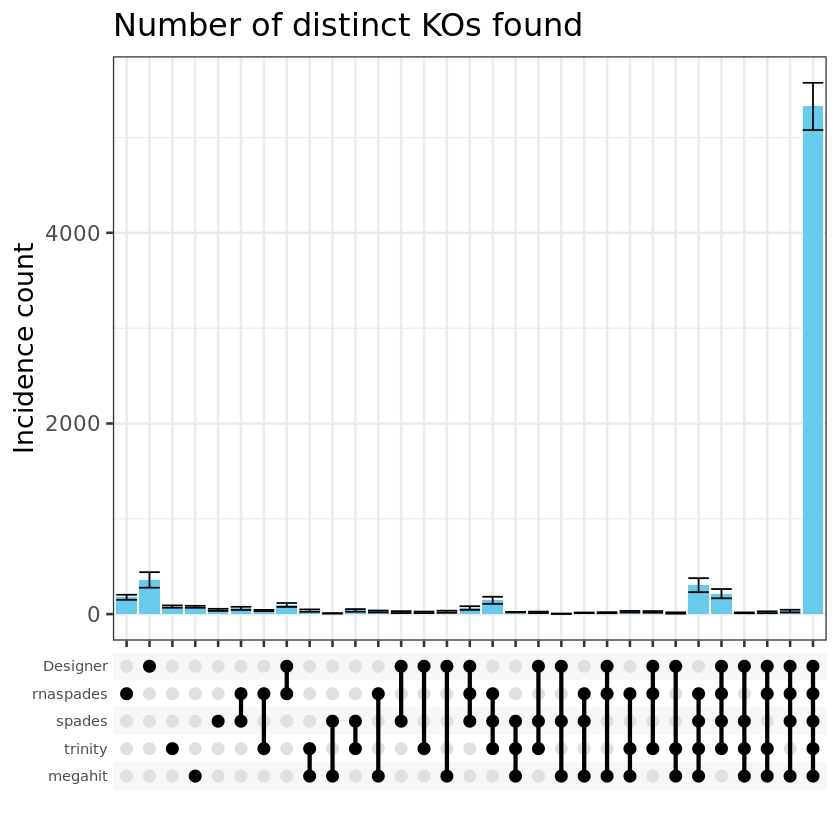

In [66]:
ko_upset_no_grp

In [71]:
for_boxplot = pivoted_KO_info %>% dplyr::filter(KEGG_ko != "-") %>%
    mutate_all(~replace(., is.nan(.), 0)) %>%
    dplyr::group_by(jEUKebox,MMETSPGroup) %>%
    pivot_longer(cols=c(CAG,Designer,megahit,rnaspades,spades,trinity),
                 names_to="Assembler",values_to="NumberIncidences") %>%
    dplyr::ungroup() %>%
    dplyr::filter(!is.na(NumberIncidences)) %>%
    dplyr::mutate(Assembler=case_when(Assembler == "CAG" ~ "Reassembly",
                TRUE ~ trimws(Assembler))) %>%
    dplyr::filter(Assembler %in% c("Designer","Reassembly")) %>%
    pivot_wider(values_from = NumberIncidences, names_from = Assembler,
                id_cols = c(KEGG_ko,jEUKebox,MMETSPGroup)) %>%
    dplyr::mutate(Category = case_when((Reassembly > 0) & (Designer > 0) ~ "Match",
                                       (Reassembly > 0) & ((Designer == 0) | (is.na(Designer))) ~ "False positive",
                                       ((Reassembly == 0)| (is.na(Reassembly))) & (Designer > 0) ~ "Not recovered")) %>%
    dplyr::group_by(MMETSPGroup,jEUKebox,Category) %>%
    dplyr::summarize(TotalOccurrencesReassembly = sum(Reassembly,na.rm=TRUE),
                     TotalOccurrencesDesigner = sum(Designer,na.rm=TRUE),
                     Count = n()) %>% ungroup() %>%
    dplyr::group_by(MMETSPGroup,Category) %>%
    dplyr::mutate(Category = factor(Category, levels = c("Match","False positive","Not recovered")))

for_boxplot_no_grp = pivoted_KO_info %>% dplyr::filter(KEGG_ko != "-") %>%
    mutate_all(~replace(., is.nan(.), 0)) %>%
    dplyr::group_by(jEUKebox) %>%
    pivot_longer(cols=c(CAG,Designer,megahit,rnaspades,spades,trinity),
                 names_to="Assembler",values_to="NumberIncidences") %>%
    dplyr::ungroup() %>%
    dplyr::filter(!is.na(NumberIncidences)) %>%
    dplyr::mutate(Assembler=case_when(Assembler == "CAG" ~ "Reassembly",
                TRUE ~ trimws(Assembler))) %>%
    dplyr::filter(Assembler %in% c("Designer","Reassembly")) %>%
    pivot_wider(values_from = NumberIncidences, names_from = Assembler,
                id_cols = c(KEGG_ko,jEUKebox)) %>%
    dplyr::mutate(Category = case_when((Reassembly > 0) & (Designer > 0) ~ "Match",
                                       (Reassembly > 0) & ((Designer == 0) | (is.na(Designer))) ~ "False positive",
                                       ((Reassembly == 0)| (is.na(Reassembly))) & (Designer > 0) ~ "Not recovered")) %>%
    dplyr::group_by(jEUKebox,Category) %>%
    dplyr::summarize(TotalOccurrencesReassembly = sum(Reassembly,na.rm=TRUE),
                     TotalOccurrencesDesigner = sum(Designer,na.rm=TRUE),
                     Count = n()) %>% ungroup() %>%
    dplyr::group_by(Category) %>%
    dplyr::mutate(Category = factor(Category, levels = c("Match","False positive","Not recovered")))

for_pointplot = pivoted_KO_info %>% dplyr::filter(KEGG_ko != "-") %>%
    mutate_all(~replace(., is.nan(.), 0)) %>%
    dplyr::group_by(jEUKebox,MMETSPGroup) %>%
    pivot_longer(cols=c(CAG,Designer,megahit,rnaspades,spades,trinity),
                 names_to="Assembler",values_to="NumberIncidences") %>%
    dplyr::ungroup() %>%
    dplyr::filter(!is.na(NumberIncidences)) %>%
    dplyr::mutate(Assembler=case_when(Assembler == "CAG" ~ "Reassembly",
                TRUE ~ trimws(Assembler))) %>%
    dplyr::filter(Assembler %in% c("Designer","Reassembly")) %>%
    pivot_wider(values_from = NumberIncidences, names_from = Assembler,
                id_cols = c(KEGG_ko,jEUKebox,MMETSPGroup)) %>%
    dplyr::mutate(Category = case_when((Reassembly > 0) & (Designer > 0) ~ "Match",
                                       (Reassembly > 0) & ((Designer == 0) | (is.na(Designer))) ~ "False positive",
                                       ((Reassembly == 0)| (is.na(Reassembly))) & (Designer > 0) ~ "Not recovered")) %>%
    dplyr::group_by(MMETSPGroup,jEUKebox,Category,KEGG_ko) %>%
    dplyr::summarize(TotalOccurrencesReassembly = sum(Reassembly,na.rm=TRUE),
                     TotalOccurrencesDesigner = sum(Designer,na.rm=TRUE),
                     Count = n()) %>% ungroup() %>%
    dplyr::group_by(MMETSPGroup,Category,KEGG_ko) %>%
    dplyr::mutate(Category = factor(Category, levels = c("Match","False positive","Not recovered")))
for_pointplot_no_grp = or_pointplot = pivoted_KO_info %>% dplyr::filter(KEGG_ko != "-") %>%
    mutate_all(~replace(., is.nan(.), 0)) %>%
    dplyr::group_by(jEUKebox) %>%
    pivot_longer(cols=c(CAG,Designer,megahit,rnaspades,spades,trinity),
                 names_to="Assembler",values_to="NumberIncidences") %>%
    dplyr::ungroup() %>%
    dplyr::filter(!is.na(NumberIncidences)) %>%
    dplyr::mutate(Assembler=case_when(Assembler == "CAG" ~ "Reassembly",
                TRUE ~ trimws(Assembler))) %>%
    dplyr::filter(Assembler %in% c("Designer","Reassembly")) %>%
    pivot_wider(values_from = NumberIncidences, names_from = Assembler,
                id_cols = c(KEGG_ko,jEUKebox)) %>%
    dplyr::mutate(Category = case_when((Reassembly > 0) & (Designer > 0) ~ "Match",
                                       (Reassembly > 0) & ((Designer == 0) | (is.na(Designer))) ~ "False positive",
                                       ((Reassembly == 0)| (is.na(Reassembly))) & (Designer > 0) ~ "Not recovered")) %>%
    dplyr::group_by(jEUKebox,Category,KEGG_ko) %>%
    dplyr::summarize(TotalOccurrencesReassembly = sum(Reassembly,na.rm=TRUE),
                     TotalOccurrencesDesigner = sum(Designer,na.rm=TRUE),
                     Count = n()) %>% ungroup() %>%
    dplyr::group_by(Category,KEGG_ko) %>%
    dplyr::mutate(Category = factor(Category, levels = c("Match","False positive","Not recovered")))

occurrences_ko = ggplot(for_pointplot) + 
    geom_abline(intercept=0,slope=1,linetype="dotted") + 
    geom_point(aes(x = TotalOccurrencesDesigner, y = TotalOccurrencesReassembly, 
                 shape = Category, fill = MMETSPGroup), size=3, alpha = 0.7) +
    theme_bw(base_size = 16) +
    xlab("Total KO occurrences, designer") +
    ylab("Total KO occurrences, reassembly") + 
    scale_shape_manual(name = "", values = c(21,22,23)) + 
    scale_y_continuous(labels = function(x) format(x, scientific = TRUE)) + 
    scale_x_continuous(labels = function(x) format(x, scientific = TRUE)) + 
    scale_fill_manual(name = "MMETSP Group", values = c("#EE6677",'#66CCEE'), guide = "none")

`summarise()` has grouped output by 'MMETSPGroup', 'jEUKebox'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'jEUKebox'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'MMETSPGroup', 'jEUKebox', 'Category'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'jEUKebox', 'Category'. You can override using the `.groups` argument.



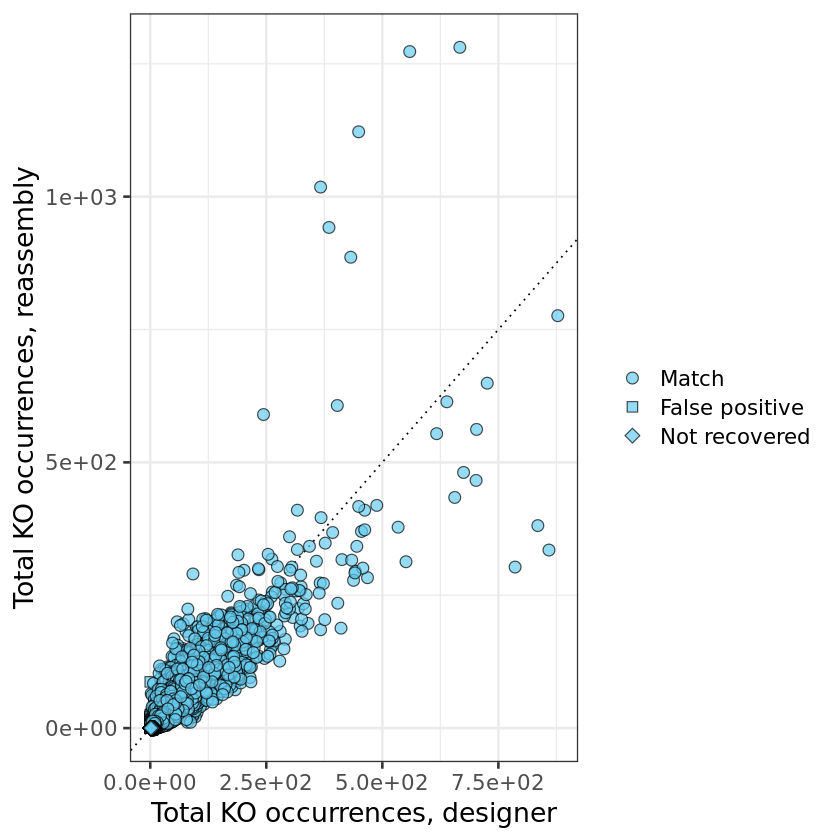

In [70]:
occurrences_ko_no_grp = ggplot(for_pointplot_no_grp) + 
    geom_abline(intercept=0,slope=1,linetype="dotted") + 
    geom_point(aes(x = TotalOccurrencesDesigner, y = TotalOccurrencesReassembly, 
                 shape = Category), size=3, alpha = 0.7,fill="#66CCEE") +
    theme_bw(base_size = 16) +
    xlab("Total KO occurrences, designer") +
    ylab("Total KO occurrences, reassembly") + 
    scale_shape_manual(name = "", values = c(21,22,23)) + 
    scale_y_continuous(labels = function(x) format(x, scientific = TRUE)) + 
    scale_x_continuous(labels = function(x) format(x, scientific = TRUE)) 
occurrences_ko_no_grp

In [72]:
ko_boxplot = ggplot(for_boxplot) + 
    geom_boxplot(aes(x = Category, y = Count, fill = MMETSPGroup)) + 
    theme_bw(base_size = 16) +
    ylab("Number of KOs") +
    scale_fill_manual(name = "MMETSP Group", values = c("#EE6677",'#66CCEE'),guide="none") + xlab("") + 
    theme(axis.text.x = element_text(angle = 25, vjust = 1, hjust=1))

ko_boxplot_no_grp = ggplot(for_boxplot_no_grp) + 
    geom_boxplot(aes(x = Category, y = Count),fill="#66CCEE") + 
    theme_bw(base_size = 16) +
    ylab("Number of KOs") + xlab("") + 
    theme(axis.text.x = element_text(angle = 25, vjust = 1, hjust=1))

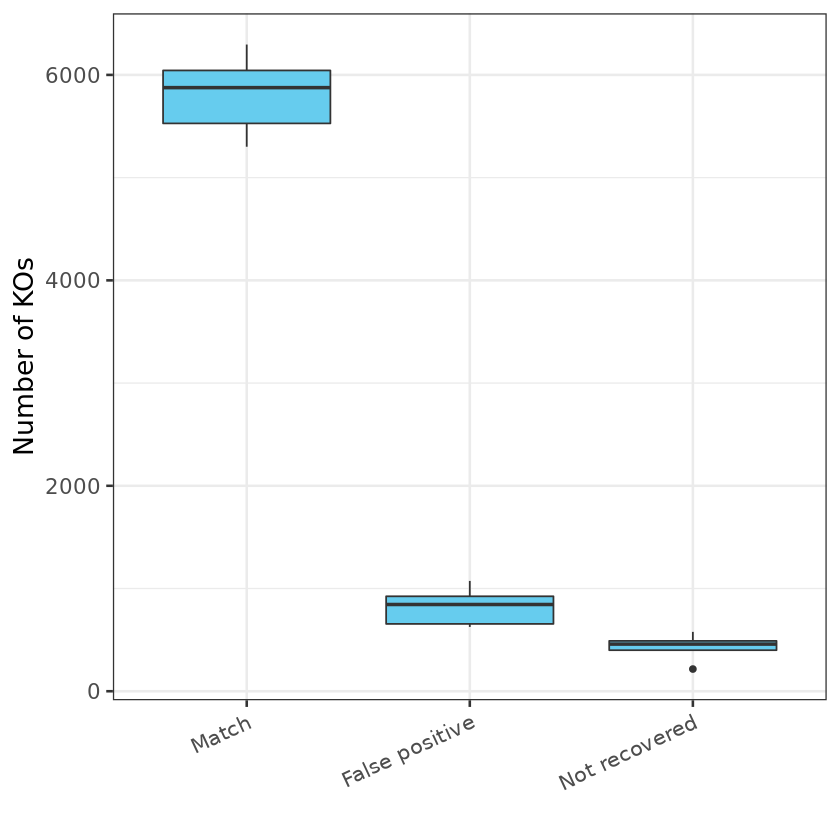

In [73]:
ko_boxplot_no_grp

In [75]:
patchwork_ko = ((ko_boxplot + ggtitle("A")) | (occurrences_ko + ggtitle("B"))) / (ko_upset + ggtitle("C")) +
  plot_layout(guides = 'collect')

ggsave(plot=patchwork_ko,filename=file.path("..","figures","Supp-ko_patchwork_figure.png"),width=12,
                                            height=10,units="in",dpi=400)

In [76]:
patchwork_ko_no_grp = ((ko_boxplot_no_grp + ggtitle("A")) | (occurrences_ko_no_grp + ggtitle("B"))) / 
                      (ko_upset_no_grp + ggtitle("C")) +
  plot_layout(guides = 'collect')

ggsave(plot=patchwork_ko_no_grp,filename=file.path("..","figures","Fig5-ko_patchwork_figure.png"),width=12,
                                            height=10,units="in",dpi=400)

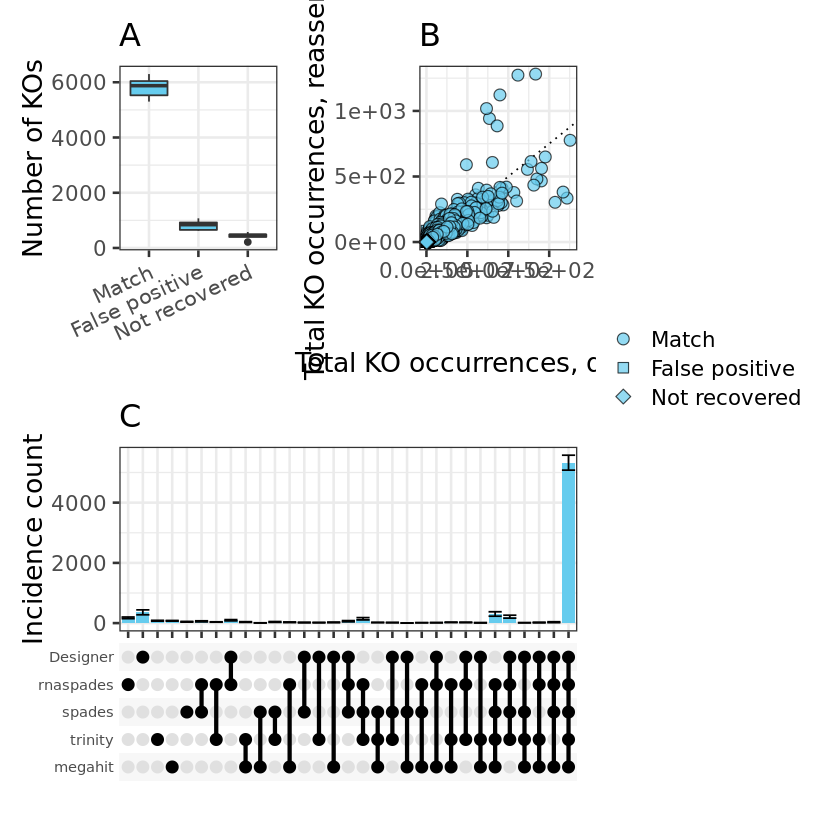

In [77]:
patchwork_ko_no_grp

## Figure 6: spurious clusters

In [92]:
compare_conds_tab["Spurious"] = compare_conds_tab["not"] / compare_conds_tab["inDes"]

In [93]:
prop_spurious = ggplot(compare_conds_tab) + geom_boxplot(aes(x = AssemblerMemCtCat, y = Spurious,
                                           group = AssemblerMemCtCat),fill = '#AA3377') + 
    #scale_x_mergelist(sep = "-") +
    theme_bw(base_size = 16) +
    ylab("Clusters with designer ÷ does not") + xlab("") + 
    xlab("Number of assemblers in cluster") + #ylim(c(0,0.50)) + 
    ggtitle("B")

In [94]:
number_cats = number_cats %>% dplyr::mutate(ListMem = sapply(Assembler_Mem,strsplit,"-"))

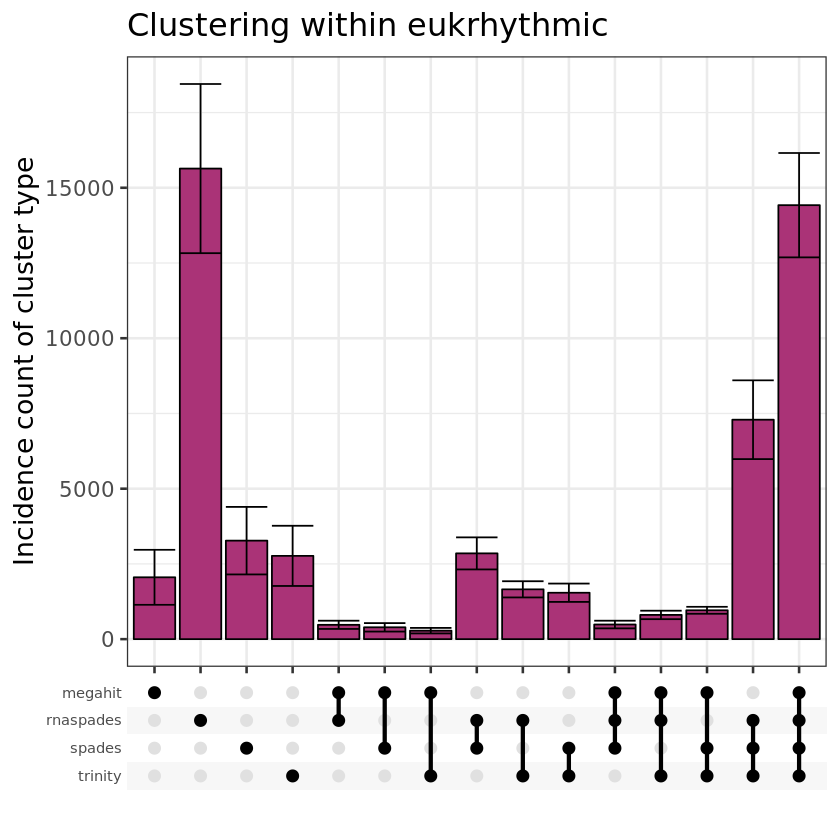

In [95]:
number_cats_rep = number_cats %>% dplyr::group_by(ListMem) %>%
       dplyr::summarize(MeanRep = mean(Representative), StdRep = sd(Representative))

ggplot(number_cats_rep, aes(x = ListMem, y = MeanRep)) +
    geom_bar(color="black", fill = '#AA3377', stat="identity", position = position_dodge(width=0.9)) +
    scale_x_upset(order="degree",intersections = unique((number_cats_rep %>% arrange(desc(MeanRep)))$ListMem)) +
    geom_errorbar(aes(x = ListMem, ymax = MeanRep+StdRep, ymin = MeanRep-StdRep)) + 
    #scale_x_mergelist(sep = "-") +
    theme_bw(base_size = 16) +
    ylab("Incidence count of cluster type") + xlab("") + 
    ggtitle("Clustering within eukrhythmic")

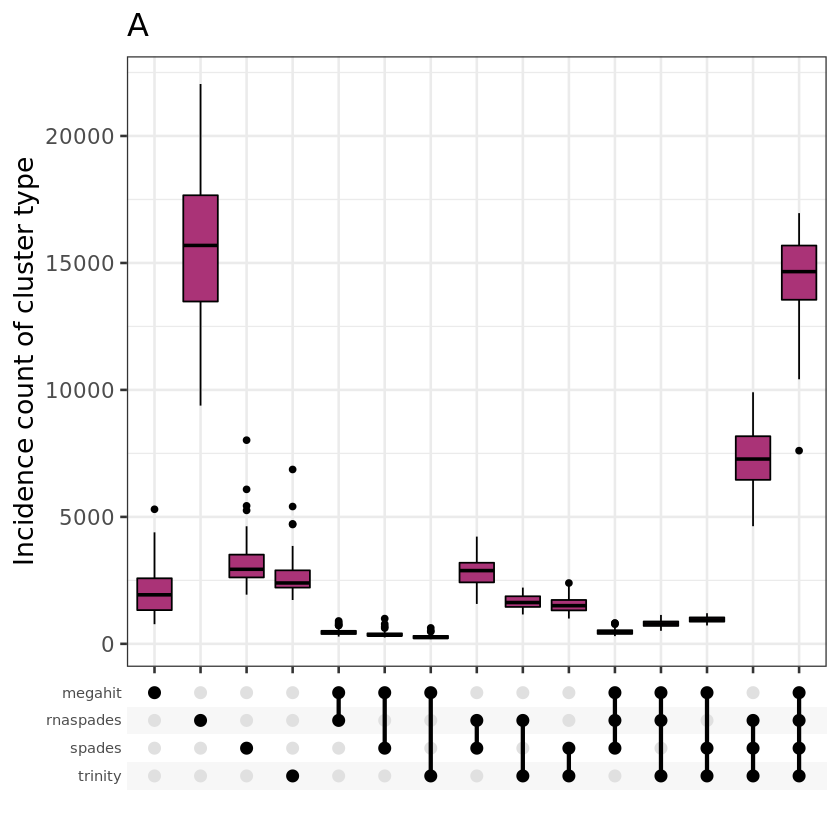

In [96]:
cluster_w_euk = ggplot(number_cats, aes(x = ListMem, y = Representative)) +
    geom_boxplot(color="black", fill = '#AA3377') +
    scale_x_upset(order="degree",intersections = unique((number_cats_rep %>% arrange(desc(MeanRep)))$ListMem)) +
    #scale_x_mergelist(sep = "-") +
    theme_bw(base_size = 16) +
    ylab("Incidence count of cluster type") + xlab("") + 
    ggtitle("A")
cluster_w_euk

In [103]:
curr_date="2022-01-24"
categories_blastmatches = data.frame(fread(file.path("..","data-output", 
                                                     paste0("all_with_blast_filled.",curr_date,".csv"))))
categories_blastmatches$AssemblerGroupList = sapply(lapply(lapply(categories_blastmatches$Assembler_Mem_create_set,
                                                                  trimws),
                                                           strsplit,"-"),unlist)

Joining, by = c("V1", "Assembler_Mem_create_set", "pident_cat", "mean", "std", "AssemblerGroupList")



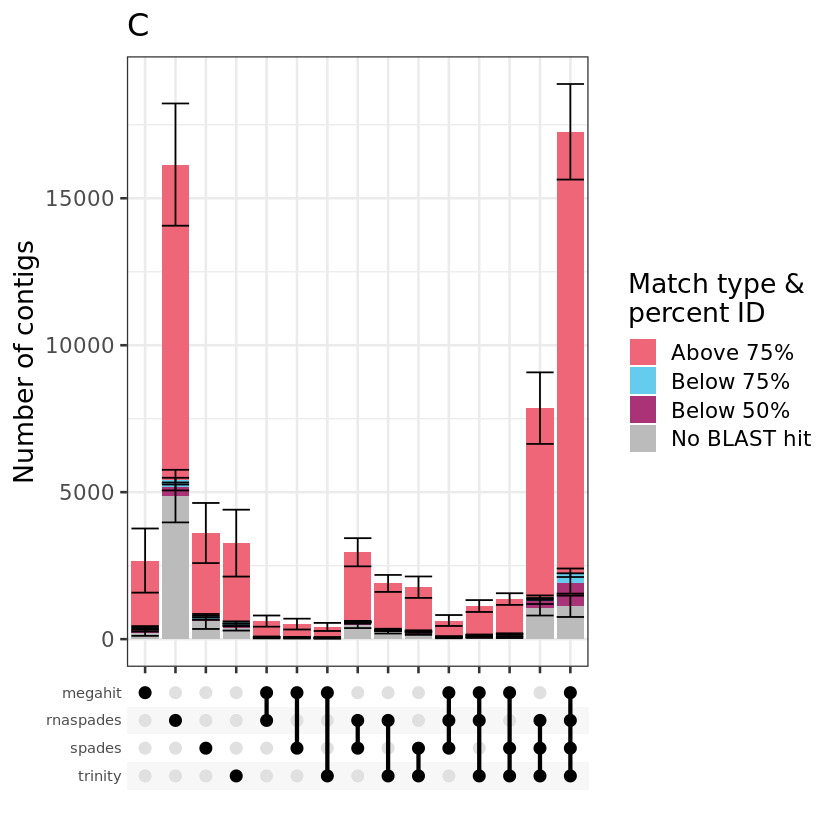

In [104]:
above75means = categories_blastmatches %>%
    dplyr::group_by(AssemblerGroupList) %>%
    dplyr::mutate(StackedMean = sum(mean))%>%
    dplyr::mutate(pident_cat = "Above75")
above50means = categories_blastmatches %>%
    dplyr::filter(pident_cat!="Above75") %>%
    dplyr::group_by(AssemblerGroupList) %>%
    dplyr::mutate(StackedMean = sum(mean))%>%
    dplyr::mutate(pident_cat = "Below75")
above0means = categories_blastmatches %>%
    dplyr::filter((pident_cat!="Above75") & (pident_cat!="Below75")) %>%
    dplyr::group_by(AssemblerGroupList) %>%
    dplyr::mutate(StackedMean = sum(mean))%>%
    dplyr::mutate(pident_cat = "Below50")
missingmeans = categories_blastmatches %>%
    dplyr::filter((pident_cat!="Above75") & (pident_cat!="Below75") &
                  (pident_cat != "Below50")) %>%
    dplyr::group_by(AssemblerGroupList) %>%
    dplyr::mutate(StackedMean = sum(mean))%>%
    dplyr::mutate(pident_cat = "Missing")
noprotmeans = categories_blastmatches %>%
    dplyr::filter((pident_cat!="Above75") & (pident_cat!="Below75") & (pident_cat !="Missing") &
                  (pident_cat != "Below50")) %>%
    dplyr::group_by(AssemblerGroupList) %>%
    dplyr::mutate(StackedMean = sum(mean)) %>%
    dplyr::mutate(pident_cat = "NoProtein")

means_for_stacking = above75means %>%
    bind_rows(above50means) %>%
    bind_rows(above0means) %>%
    bind_rows(missingmeans) %>%
    bind_rows(noprotmeans)

prot_perc_id = ggplot(categories_blastmatches %>%
       dplyr::left_join(means_for_stacking) %>%
       dplyr::mutate(pident_cat = factor(case_when(pident_cat == "Above75" ~ "Above 75%",
                                            pident_cat == "Below50" ~ "Below 50%",
                                            pident_cat == "Below75" ~ "Below 75%",
                                            pident_cat == "Missing" ~ "No BLAST hit",
                                            pident_cat == "NoProtein" ~ "No ORF found"),
                                         levels = c("Above 75%",
                                                    "Below 75%",
                                                    "Below 50%",
                                                    "No BLAST hit",
                                                    "No ORF found"))), 
                                         aes(x = AssemblerGroupList, y = as.numeric(mean))) +
    geom_bar(aes(fill = factor(pident_cat), group=factor(pident_cat)),
             stat="identity", position = "stack") +
    geom_errorbar(aes(ymin = as.numeric(StackedMean)-as.numeric(std),
                      ymax = as.numeric(StackedMean)+as.numeric(std))) + 
    scale_x_upset(order="degree") +
    theme_bw(base_size = 16) +
    ylab("Number of contigs") + xlab("") + 
    scale_fill_manual(name="Match type & \npercent ID", values=c("#EE6677",'#66CCEE', '#AA3377', '#BBBBBB', "black")) + 
    #scale_fill_gradientn(name="No. Proteins",colors=c("#1E9600","#FFF200","#3b8d99")) + 
    ggtitle("C")# - Proteins and BLAST matches")
prot_perc_id

In [105]:
patchwork_fig_4 = (cluster_w_euk + (prop_spurious + theme(legend.position = "none"))) / 
    (prot_perc_id + theme(legend.position="bottom")) + 
  plot_layout(guides = 'keep') + 
  plot_layout(widths = c(2, 1))

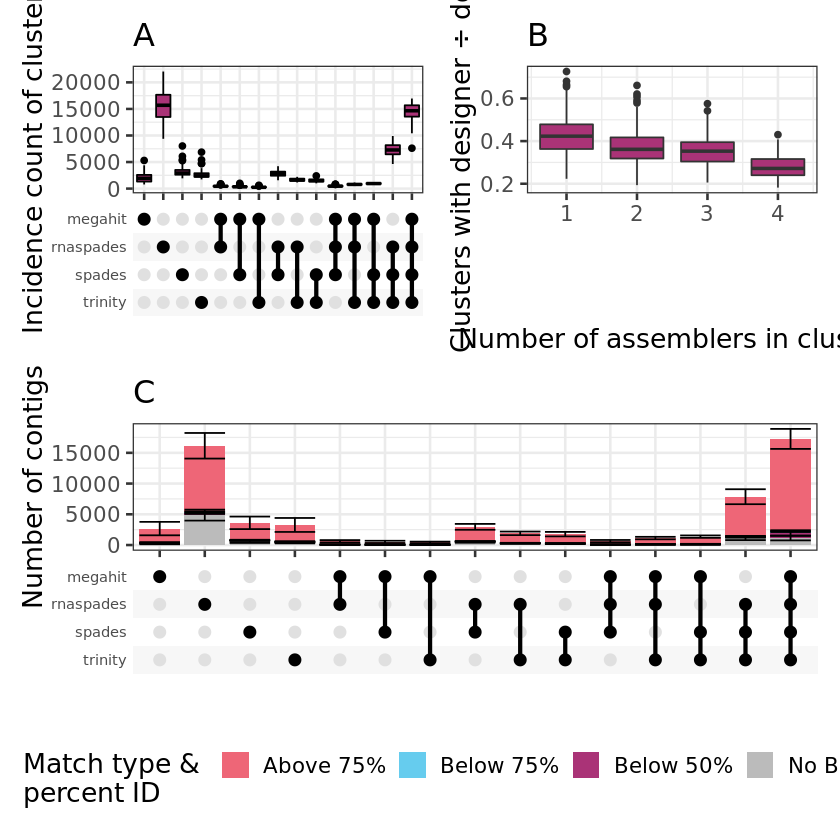

In [106]:
patchwork_fig_4

## Recovered proteins by assembler

In [109]:
prot_merg_ct$AssemblerGroupList = sapply(lapply(lapply(prot_merg_ct$AssemblerGroup,trimws),strsplit,"-"),unlist)

In [162]:
prot_recover = ggplot(prot_merg_ct, aes(x = AssemblerGroupList, y = as.numeric(Assembler_Rep))) +
    geom_bar(aes(fill = factor(ProteinNumber), group=factor(ProteinNumber)),
             color="black", stat="identity", position = "fill") +
    scale_x_upset(order="degree") + #,intersections = unique((number_cats_rep %>% arrange(desc(MeanRep)))$ListMem)) +
    #geom_errorbar(aes(x = ListMem, ymax = MeanRep+StdRep, ymin = MeanRep-StdRep)) + 
    #scale_x_mergelist(sep = "-") +
    theme_bw(base_size = 16) +
    ylab("Proportion of contigs") + xlab("") + 
    scale_fill_manual(name="# Proteins", values=c("black","#78db7e","#8965ef","#f0c017",
                                                  "#961480","#01813e","#aa000d",
                                                  "#758000","#ff7ca4","#804216",
                                                  "#a2729c")) + 
    #scale_fill_gradientn(name="No. Proteins",colors=c("#1E9600","#FFF200","#3b8d99")) + 
    ggtitle("Proteins recovered from eukrhythmic contigs")
#ggsave(plot=prot_recover,file="proteins_recovered.png",dpi=300,width=6,height=6,units="in")

ggsave(filename=file.path("..","figures","Supp-protein_number_assembler.png"),width=10,
                                            height=6,units="in",dpi=400)

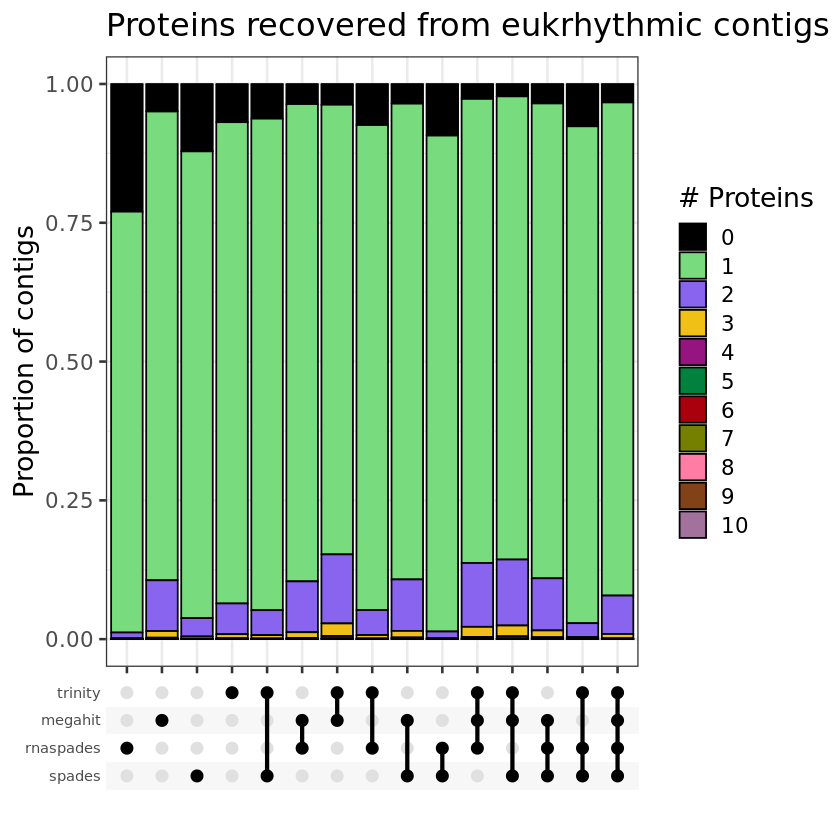

In [121]:
prot_recover

In [139]:
assembler_protein_ct = all_number_proteins_merged  %>% separate_rows(Assembler_Mem.create_set,sep="-") %>% 
           dplyr::group_by(Name,ProteinNumber,Assembler_Mem.create_set) %>%
           dplyr::tally()

assembler_protein_tot = assembler_protein_ct %>%
    dplyr::group_by(Assembler_Mem.create_set,Name) %>% dplyr::summarize(totn = sum(n))

assembler_protein_ct = assembler_protein_ct %>%
    dplyr::left_join(assembler_protein_tot,by=c("Assembler_Mem.create_set","Name"))

`summarise()` has grouped output by 'Assembler_Mem.create_set'. You can override using the `.groups` argument.



In [140]:
head(assembler_protein_ct)

Name,ProteinNumber,Assembler_Mem.create_set,n,totn
<chr>,<dbl>,<chr>,<int>,<int>
jEUKebox-Trial1-100k,0,megahit,3871,118405
jEUKebox-Trial1-100k,0,rnaspades,28556,250656
jEUKebox-Trial1-100k,0,spades,10343,179152
jEUKebox-Trial1-100k,0,trinity,8497,173982
jEUKebox-Trial1-100k,1,megahit,103465,118405
jEUKebox-Trial1-100k,1,rnaspades,210483,250656


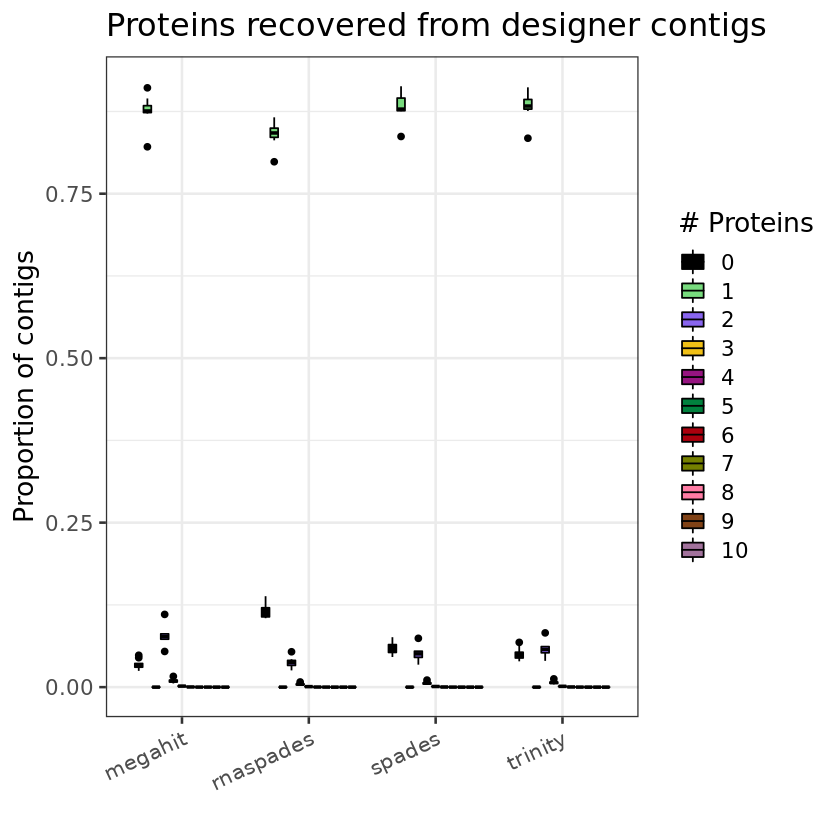

In [146]:
distinct_cols <- c("black","#78db7e","#8965ef","#f0c017",
                                                  "#961480","#01813e","#aa000d",
                                                  "#758000","#ff7ca4","#804216",
                                                  "#a2729c",
                   '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', 
                   '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
                   '#9a6324', '#fffac8', '#800000', '#aaffc3', 
                   '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000')
ggplot(assembler_protein_ct) +
    geom_boxplot(aes(x = factor(Assembler_Mem.create_set), fill = factor(ProteinNumber),
                    y = n/totn, group=paste0(Assembler_Mem.create_set,ProteinNumber)),
             color="black") +
    theme_bw(base_size = 16) +
    ylab("Proportion of contigs") + xlab("") + 
    scale_fill_manual(name="# Proteins", values=distinct_cols) + 
    #scale_fill_gradientn(name="No. Proteins",colors=c("#1E9600","#FFF200","#3b8d99")) + 
    ggtitle("Proteins recovered from designer contigs") + 
    theme(axis.text.x = element_text(angle = 25, vjust = 1, hjust=1))

`summarise()` has grouped output by 'ProteinNumber'. You can override using the `.groups` argument.



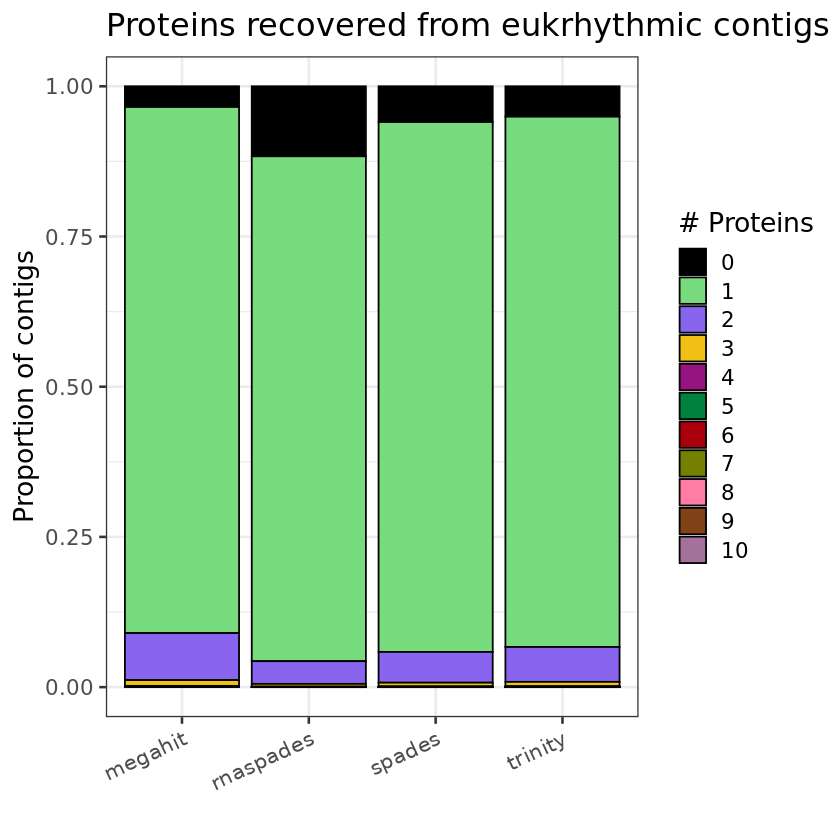

In [161]:
ggplot(assembler_protein_ct %>% dplyr::group_by(ProteinNumber,Assembler_Mem.create_set) %>%
       dplyr::summarize(MeanFraction = mean(n/totn),
                        SDFraction = sd(n/totn))) +
    geom_bar(aes(x = factor(Assembler_Mem.create_set), fill = factor(ProteinNumber),
                    y = MeanFraction),
             color="black", stat="identity") +
    #geom_errorbar(aes(x = factor(Assembler_Mem.create_set), color = factor(ProteinNumber),
    #                ymin = MeanFraction - SDFraction, ymax = MeanFraction + SDFraction),
    #         color="black", stat="identity") +
    theme_bw(base_size = 16) +
    ylab("Proportion of contigs") + xlab("") + 
    scale_fill_manual(name="# Proteins", values=distinct_cols) + 
    #scale_fill_gradientn(name="No. Proteins",colors=c("#1E9600","#FFF200","#3b8d99")) + 
    #scale_fill_gradient(name="No. Proteins",low="light blue",high="maroon") + 
    ggtitle("Proteins recovered from eukrhythmic contigs") + 
    theme(axis.text.x = element_text(angle = 25, vjust = 1, hjust=1))

ggsave(filename=file.path("..","figures","Supp-protein_number_eukrhythmic.png"),width=10,
                                            height=6,units="in",dpi=400)

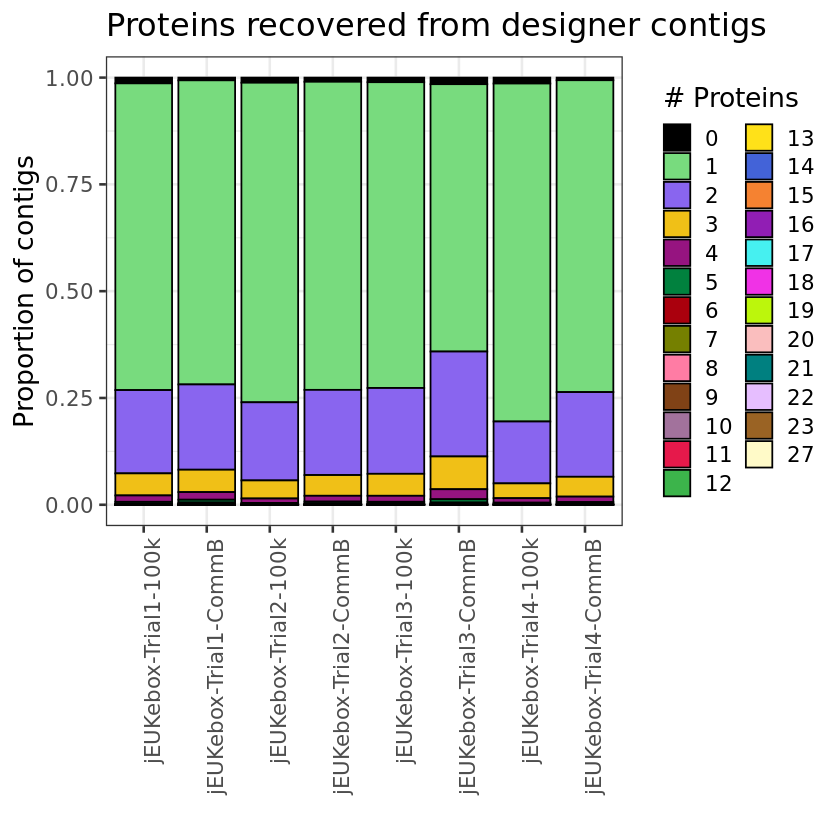

In [160]:

distinct_cols <- c("black","#78db7e","#8965ef","#f0c017",
                                                  "#961480","#01813e","#aa000d",
                                                  "#758000","#ff7ca4","#804216",
                                                  "#a2729c",
                   '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', 
                   '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
                   '#9a6324', '#fffac8', '#800000', '#aaffc3', 
                   '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000')
ggplot(all_number_proteins_designer %>% dplyr::group_by(jEUKebox,ProteinNumber) %>%
           dplyr::tally(), aes(x = jEUKebox, y = as.numeric(n))) +
    geom_bar(aes(fill = factor(ProteinNumber), group=factor(ProteinNumber)),
             color="black", stat="identity", position = "fill") +
    theme_bw(base_size = 16) +
    ylab("Proportion of contigs") + xlab("") + 
    scale_fill_manual(name="# Proteins", values=distinct_cols) + 
    #scale_fill_gradientn(name="No. Proteins",colors=c("#1E9600","#FFF200","#3b8d99")) + 
    ggtitle("Proteins recovered from designer contigs") + 
    theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1))

ggsave(filename=file.path("..","figures","Supp-protein_number_designer.png"),width=10,
                                            height=6,units="in",dpi=400)

In [132]:
head(all_number_proteins_merged,n=50)  %>% separate_rows(Assembler_Mem.create_set,sep="-") %>% 
           dplyr::group_by(Name,ProteinNumber,Assembler_Mem.create_set) %>%
           dplyr::tally()

Name,ProteinNumber,Assembler_Mem.create_set,n
<chr>,<dbl>,<chr>,<int>
jEUKebox-Trial3-CommB,0,megahit,4
jEUKebox-Trial3-CommB,1,megahit,35
jEUKebox-Trial3-CommB,1,rnaspades,3
jEUKebox-Trial3-CommB,1,spades,3
jEUKebox-Trial3-CommB,1,trinity,5
jEUKebox-Trial3-CommB,2,megahit,10
jEUKebox-Trial3-CommB,2,rnaspades,2
jEUKebox-Trial3-CommB,2,spades,1
jEUKebox-Trial3-CommB,2,trinity,2


## Plot Narragansett Bay data

In [8]:
# read in the salmon files from the individual assemblies
base_dir = "/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett"
percent_mapped_byassembler_nb = data.frame()
for (jeukebox_dir in "") {
    comm_curr = unlist(strsplit(jeukebox_dir,"-"))
    comm_curr = comm_curr[length(comm_curr)]
    stub_dir = file.path(base_dir, jeukebox_dir,
                         "intermediate-files/04-compare/xx-individual-mapping/salmon")
    if (!dir.exists(stub_dir)) {
        next
    }
    list_names = c()
    list_percents = c()
    list_assemblers = c()
    for (dir in list.files(stub_dir)) {
        if (grepl("quant",dir)) {
            if (file.exists(file.path(stub_dir, dir, "aux_info", "meta_info.json"))) {
                curr_file = file.path(stub_dir, dir, "aux_info", "meta_info.json")
                json_percentmapped = fromJSON(paste(readLines(curr_file), collapse=""))$percent_mapped
                qualifiers = unlist(strsplit(dir,"_"))
                list_percents = c(list_percents,json_percentmapped)
                list_assemblers = c(list_assemblers, qualifiers[3])
                list_names = c(list_names, qualifiers[2])
            }
        }
    }
    percent_mapped_byassembler = data.frame("PercentMapped" = list_percents,
                                            "Assemblers" = list_assemblers,
                                            "Sample" = list_names)
    percent_mapped_byassembler_nb = percent_mapped_byassembler_nb %>%
        bind_rows(percent_mapped_byassembler)
}

Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/xx-individual-mapping/salmon/NarBay_A_megahit_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/xx-individual-mapping/salmon/NarBay_A_rnaspades_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/xx-individual-mapping/salmon/NarBay_A_spades_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediat

Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/xx-individual-mapping/salmon/NarBay_S3_spades_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/xx-individual-mapping/salmon/NarBay_S3_trinity_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/xx-individual-mapping/salmon/NarBay_S4_megahit_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermedia

In [9]:
percent_mapped_byassembler_nb

PercentMapped,Assemblers,Sample
<dbl>,<chr>,<chr>
65.89528,megahit,A
76.64544,rnaspades,A
72.80815,spades,A
68.62108,trinity,A
57.92243,megahit,B
70.06820,rnaspades,B
65.51252,spades,B
59.45587,trinity,B
59.33827,megahit,C


Picking joint bandwidth of 3.49



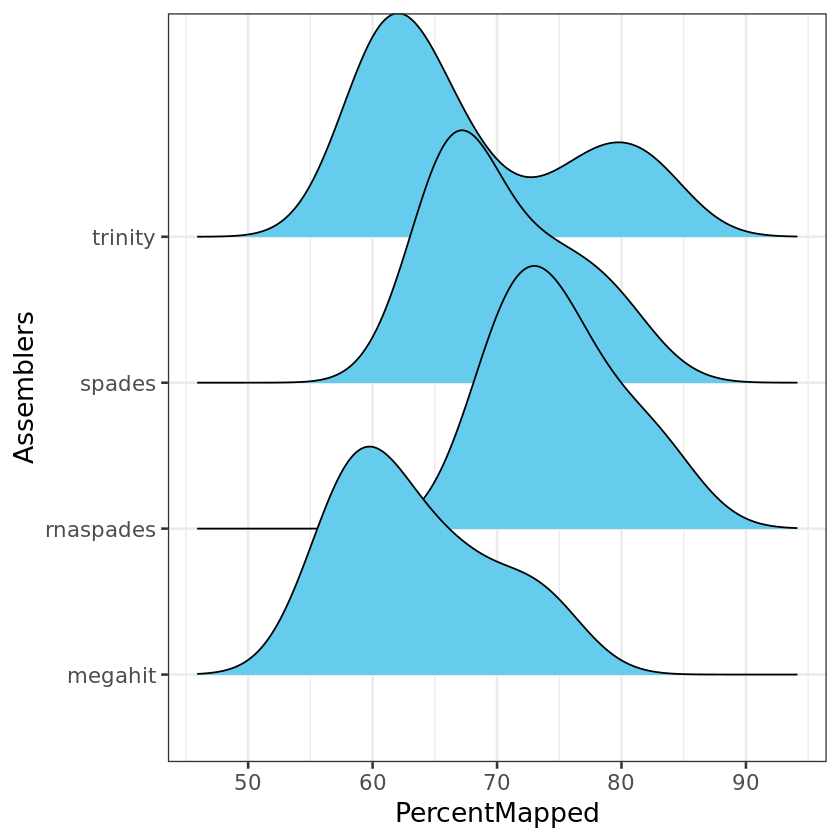

In [10]:
ggplot(percent_mapped_byassembler_nb) + geom_density_ridges(aes(x = PercentMapped, 
                                                                y = Assemblers),fill="#66CCEE") + 
    theme_bw(base_size=16)

In [11]:
# read in the salmon files from the CAG assemblies
base_dir = "/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett"
percent_mapped_cag_nb = data.frame()
for (jeukebox_dir in "") {
    stub_dir = file.path(base_dir, jeukebox_dir,
                         "intermediate-files/04-compare/09-CAG-mapping/salmon")
    if (!dir.exists(stub_dir)) {
        next
    }
    list_names = c()
    list_percents = c()
    list_assemblers = c()
    for (dir in list.files(stub_dir)) {
        if (grepl("quant",dir)) {
            if (file.exists(file.path(stub_dir, dir, "aux_info", "meta_info.json"))) {
                curr_file = file.path(stub_dir, dir, "aux_info", "meta_info.json")
                json_percentmapped = fromJSON(paste(readLines(curr_file), collapse=""))$percent_mapped
                qualifiers = unlist(strsplit(dir,"_"))
                list_percents = c(list_percents,json_percentmapped)
                list_assemblers = c(list_assemblers, qualifiers[1])
                list_names = c(list_names, qualifiers[2])
            }
        }
    }
    percent_mapped_cag = data.frame("PercentMapped" = list_percents,
                                    "Assemblers" = "CAG",
                                    "Sample" = list_names)
    percent_mapped_cag_nb = percent_mapped_cag_nb %>%
        bind_rows(percent_mapped_cag)
}

Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/09-CAG-mapping/salmon/NarBay_A_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/09-CAG-mapping/salmon/NarBay_B_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/09-CAG-mapping/salmon/NarBay_C_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/09-CAG-mapping/salmon/NarBa

In [12]:
percent_mapped_cag_nb

PercentMapped,Assemblers,Sample
<dbl>,<chr>,<chr>
78.98359,CAG,A
72.66681,CAG,B
73.30640,CAG,C
85.64299,CAG,D
75.30143,CAG,E
76.28332,CAG,S1
73.06091,CAG,S2
76.58962,CAG,S3
80.14456,CAG,S4


In [13]:
# read in the salmon files from the CAG assemblies
base_dir = "/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett"
percent_mapped_mad_nb = data.frame()
for (jeukebox_dir in "") {
    stub_dir = file.path(base_dir, jeukebox_dir,
                         "intermediate-files/04-compare/14-MAD-mapping/salmon")
    if (!dir.exists(stub_dir)) {
        next
    }
    list_names = c()
    list_percents = c()
    list_assemblers = c()
    for (dir in list.files(stub_dir)) {
        if (grepl("quant",dir)) {
            if (file.exists(file.path(stub_dir, dir, "aux_info", "meta_info.json"))) {
                curr_file = file.path(stub_dir, dir, "aux_info", "meta_info.json")
                json_percentmapped = fromJSON(paste(readLines(curr_file), collapse=""))$percent_mapped
                qualifiers = unlist(strsplit(dir,"_"))
                list_percents = c(list_percents,json_percentmapped)
                list_assemblers = c(list_assemblers, qualifiers[1])
                list_names = c(list_names, qualifiers[2])
            }
        }
    }
    percent_mapped_cag = data.frame("PercentMapped" = list_percents,
                                    "Assemblers" = "MAD",
                                    "Sample" = list_names)
    percent_mapped_mad_nb = percent_mapped_mad_nb %>%
        bind_rows(percent_mapped_cag)
}

Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/14-MAD-mapping/salmon/merged_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/14-MAD-mapping/salmon/NarBay_A_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/14-MAD-mapping/salmon/NarBay_B_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/14-MAD-mapping/salmon/NarBay_

In [16]:
percent_mapped_mad_nb %>% dplyr::bind_rows(percent_mapped_byassembler_nb) %>%
    dplyr::bind_rows(percent_mapped_cag_nb)

PercentMapped,Assemblers,Sample
<dbl>,<chr>,<chr>
81.83584,MAD,quant
83.41766,MAD,A
78.76768,MAD,B
79.20698,MAD,C
89.86193,MAD,D
81.51964,MAD,E
79.25875,MAD,S1
77.54935,MAD,S2
80.28504,MAD,S3


Picking joint bandwidth of 3.06



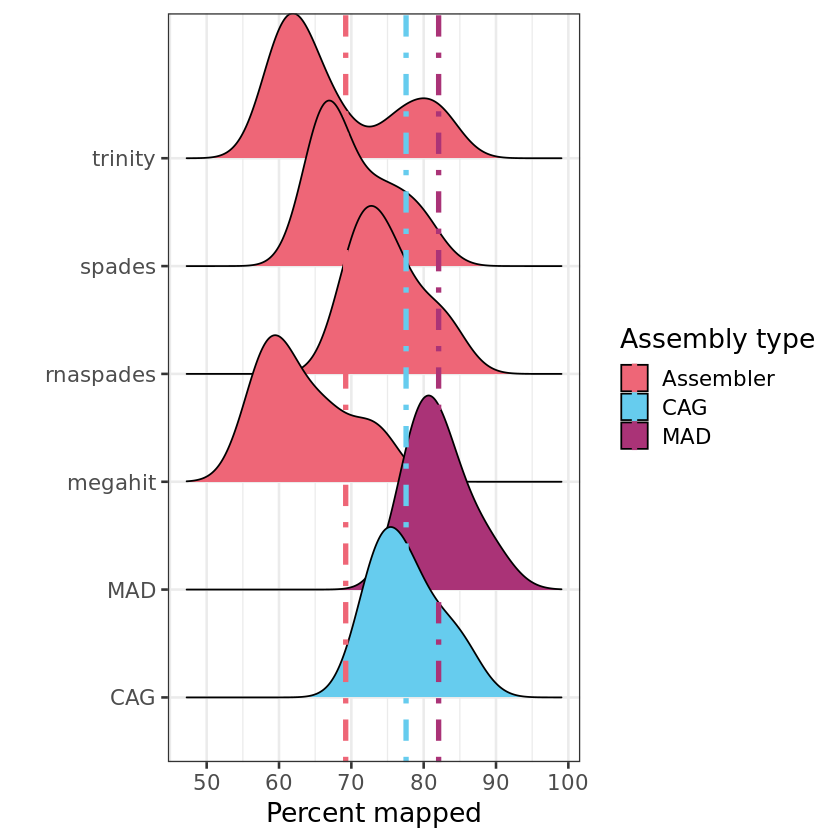

In [43]:
for_ridgeplot =percent_mapped_mad_nb %>% dplyr::mutate(FillCol="MAD")%>% dplyr::bind_rows(percent_mapped_byassembler_nb %>% 
                                                  dplyr::mutate(FillCol="Assembler")) %>%
    dplyr::bind_rows(percent_mapped_cag_nb %>% dplyr::mutate(FillCol="CAG"))

for_ridgeplot_means = for_ridgeplot %>% dplyr::group_by(FillCol) %>% 
    dplyr::summarize(meanPercMapped=mean(PercentMapped))
ridge_assemblers_nb = ggplot(for_ridgeplot) + 
    geom_density_ridges(aes(x = PercentMapped, y = Assemblers, fill = FillCol)) + 
    geom_vline(data=for_ridgeplot_means, aes(xintercept=meanPercMapped,col=FillCol),
               linetype="dotdash",size=1.5)+
    theme_bw(base_size=16)+ ylab("") + xlab("Percent mapped") +
    scale_fill_manual(name="Assembly type", values=c("#EE6677",'#66CCEE', 
                                                     '#AA3377', '#BBBBBB', "black"))  +
    scale_color_manual(name="Assembly type", values=c("#EE6677",'#66CCEE', 
                                                     '#AA3377', '#BBBBBB', "black")) 
ridge_assemblers_nb


In [182]:
percent_mapped_cag_nb

PercentMapped,Assemblers,Sample
<dbl>,<chr>,<chr>
78.98359,NarBay,A
72.66681,NarBay,B
73.30640,NarBay,C
85.64299,NarBay,D
75.30143,NarBay,E
76.28332,NarBay,S1
73.06091,NarBay,S2
76.58962,NarBay,S3
80.14456,NarBay,S4


In [28]:
head(EUKulele_frame_check)

,V1,Order,Domain,Phylum,Class,TPMcount,TPMsum,Sample,Assembler
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,0,Acanthoecida,Eukaryota,Other,Choanoflagellatea,5196,3330.065439,NarBay_S2,megahit
2,1,Acidimicrobiales,Bacteria,Other,Actinobacteria (Class),10,6.719352,NarBay_S2,megahit
3,2,Actinomycetales,Bacteria,Other,Actinobacteria (Class),1,0.349790,NarBay_S2,megahit
4,3,Aeromonadales,Bacteria,Other,Gammaproteobacteria,7,4.999453,NarBay_S2,megahit
5,4,Alteromonadales,Bacteria,Other,Gammaproteobacteria,8,4.506805,NarBay_S2,megahit
6,5,Alteromonadales,Bacteria,Other,Gammaproteobacteria,131,101.268982,NarBay_S2,megahit


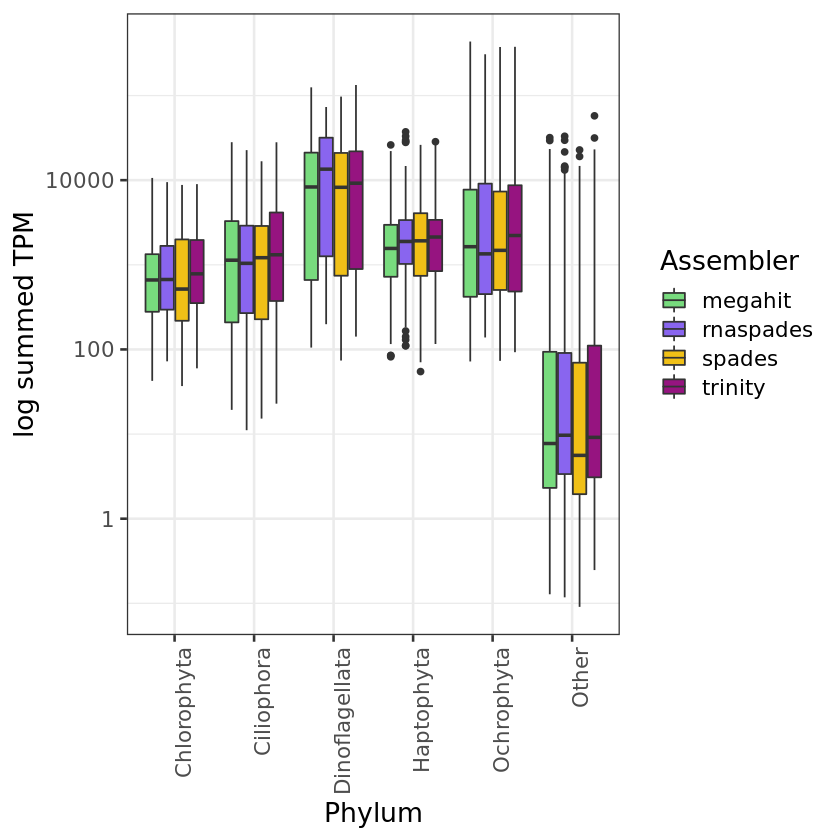

In [35]:
distinct_cols <- c("#78db7e","#8965ef","#f0c017",
                                                  "#961480","#01813e","#aa000d",
                                                  "#758000","#ff7ca4","#804216",
                                                  "#a2729c",
                   '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', 
                   '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
                   '#9a6324', '#fffac8', '#800000', '#aaffc3', 
                   '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000')

ggplot(EUKulele_frame_check) + geom_boxplot(aes(x=Phylum,y=TPMsum,
                                                fill=Assembler,group=paste0(Assembler,Phylum))) + 
    scale_y_log10() + theme_bw(base_size=16)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1)) + 
    scale_fill_manual(values=distinct_cols) + ylab("log summed TPM")

In [40]:
EUKulele_frame_check

V1,Order,Domain,Phylum,Class,TPMcount,TPMsum,Sample,Assembler
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
0,Acanthoecida,Eukaryota,Other,Choanoflagellatea,5196,3.330065e+03,NarBay_S2,megahit
1,Acidimicrobiales,Bacteria,Other,Actinobacteria (Class),10,6.719352e+00,NarBay_S2,megahit
2,Actinomycetales,Bacteria,Other,Actinobacteria (Class),1,3.497900e-01,NarBay_S2,megahit
3,Aeromonadales,Bacteria,Other,Gammaproteobacteria,7,4.999453e+00,NarBay_S2,megahit
4,Alteromonadales,Bacteria,Other,Gammaproteobacteria,8,4.506805e+00,NarBay_S2,megahit
5,Alteromonadales,Bacteria,Other,Gammaproteobacteria,131,1.012690e+02,NarBay_S2,megahit
6,Anaerolineales,Bacteria,Other,Anaerolineae,2,1.056244e+00,NarBay_S2,megahit
7,Anoecales,Eukaryota,Other,Bicoecea,791,5.267472e+02,NarBay_S2,megahit
8,Aquificales,Bacteria,Other,Aquificae (Class),2,4.527966e+00,NarBay_S2,megahit


`summarise()` has grouped output by 'Assembler'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Assembler', 'Sample'. You can override using the `.groups` argument.

Joining, by = c("Assembler", "Sample")



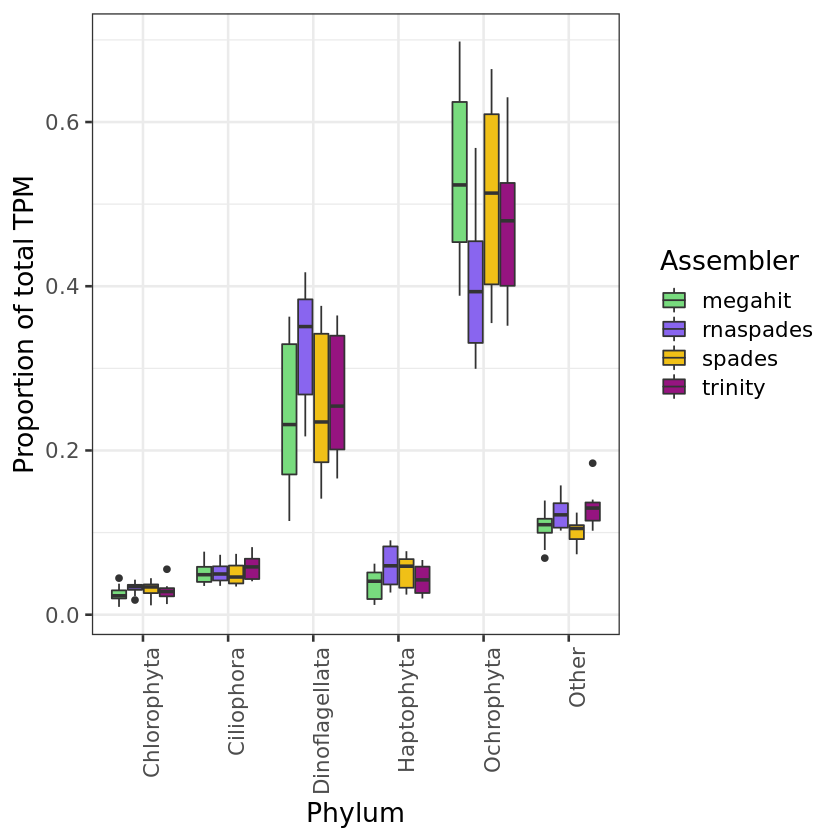

In [44]:
EUKulele_frame_check_sum = EUKulele_frame_check %>% dplyr::group_by(Assembler,Sample) %>%
    dplyr::summarize(sumTPMall = sum(TPMsum))
boxplot_fract_nb = ggplot(EUKulele_frame_check %>% dplyr::group_by(Assembler,Sample,Phylum) %>%
       dplyr::summarize(TPMsum=sum(TPMsum)) %>% dplyr::left_join(EUKulele_frame_check_sum)) + 
    geom_boxplot(aes(x=Phylum,y=TPMsum/sumTPMall,fill=Assembler,group=paste0(Assembler,Phylum))) + 
    #scale_y_log10() + 
    theme_bw(base_size=16)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1)) + 
    scale_fill_manual(values=distinct_cols) + ylab("Proportion of total TPM")
boxplot_fract_nb

Picking joint bandwidth of 3.06



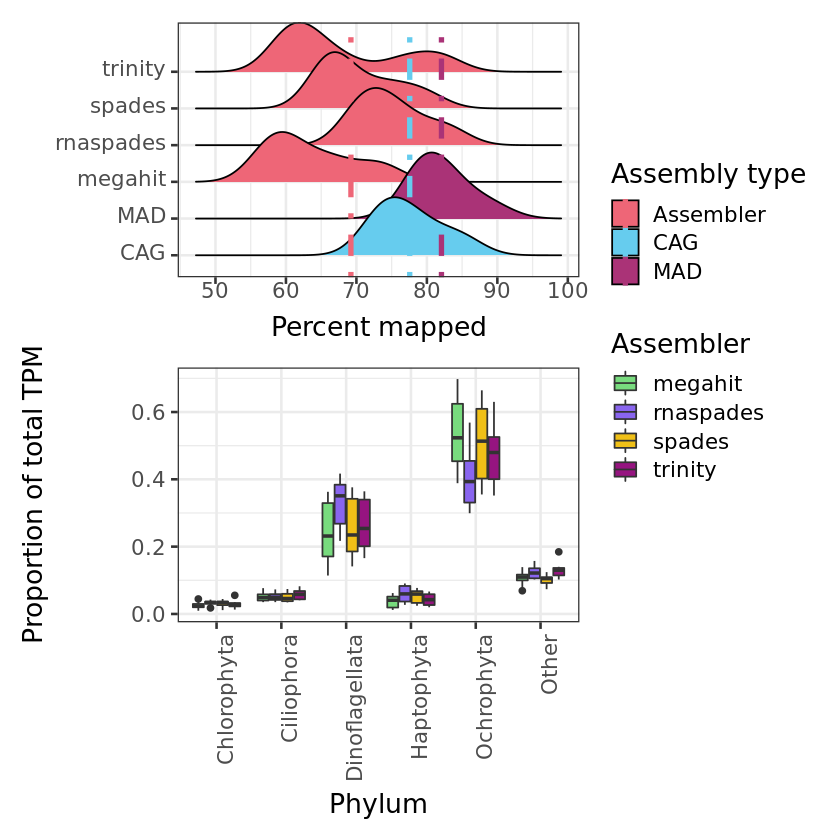

In [47]:
ridge_assemblers_nb / boxplot_fract_nb + 
  plot_layout(guides = 'collect')